[fedstat.ru](https://www.fedstat.ru/indicator/31293) (ЕМИСС - Единая межведомственная информационно-статистическая система)<br>
[Продолжительность жизни в субъектах РФ](https://ru.wikipedia.org/wiki/Продолжительность_жизни_в_субъектах_Российской_Федерации)<br>
[selection of colors](http://mal-bioit.ru/programs/small/survey-web-colors.html)<br>
[Контактная карта сторонников продления жизни](https://www.google.com/maps/d/viewer?mid=10tOk78kyhG7wrDUweEBk34Uog-mElPIt&ll=54.792332677644666%2C40.6355878361973&z=4)<br>
[broken axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html#sphx-glr-gallery-subplots-axes-and-figures-broken-axis-py)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import namedtuple
import math

from my_dictionaries import dd_Russia_rus_to_eng_with_declations as dd_rus_to_eng

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.width = 250

DESTINATION_OUTPUT = 'show'
CHART_COMPLEXITY = 'simple'  # 'with_differences' / 'simple'
CHART_SHOWN_DATA = 'all_data'          # 'all_data' / 'only_dender'
LANG = 'ru'
FIGURE_SIZE_SIMPLE = (16, 12)
FIGURE_SIZE_WITH_DIFF = (15, 15)
HOR_LINES = [1991, 1998, 2000, 2019]

In [3]:
# load stats about longevity per gender ('genloc' is abbreviation for 'gender and location'
genloc = pd.read_excel('data/Rosstat_LE_all.xls', skiprows=2)

print(genloc.shape)
genloc.head(2)

(972, 35)


Unnamed: 0 Unnamed: 1           Unnamed: 2  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010   2011   2012  2013   2014   2015   2016   2017   2018   2019  \
0  Российская Федерация    Женщины        все население  74.3  74.2  73.7  71.8  71.1  71.6  72.4  72.8  73.1  72.4  72.3  72.2  71.9  71.9  72.4  72.5  73.3  74.0  74.3  74.8  74.9  75.61  75.86  76.3  76.47  76.71  77.06  77.64  77.82  78.17   
1  Российская Федерация    Женщины  городское население  74.3  74.3  73.7  71.9  71.2  71.6  72.6  73.2  73.4  72.6  72.5  72.4  72.2  72.2  72.7  73.0  73.9  74.5  74.8  75.3  75.4  76.10  76.27  76.7  76.83  77.09  77.38  77.96  78.09  78.41   

    2020   2021  
0  76.43  74.51  
1  76.61  74.69

In [4]:
# rename columns
genloc.rename(columns={'Unnamed: 0': 'region', 'Unnamed: 1': 'gender', 'Unnamed: 2': 'location'}, inplace=True)

# remove surrounding spaces in the column with names of regions
genloc['region'] = genloc['region'].map(lambda st: st.strip())

genloc.replace(0, np.NaN, inplace=True)

print('Number of records:', len(genloc))
genloc.head(10)

Number of records: 972


region    gender             location  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010   2011   2012   2013   2014   2015   2016   2017   2018  \
0           Российская Федерация   Женщины        все население  74.3  74.2  73.7  71.8  71.1  71.6  72.4  72.8  73.1  72.4  72.3  72.2  71.9  71.9  72.4  72.5  73.3  74.0  74.3  74.8  74.9  75.61  75.86  76.30  76.47  76.71  77.06  77.64  77.82   
1           Российская Федерация   Женщины  городское население  74.3  74.3  73.7  71.9  71.2  71.6  72.6  73.2  73.4  72.6  72.5  72.4  72.2  72.2  72.7  73.0  73.9  74.5  74.8  75.3  75.4  76.10  76.27  76.70  76.83  77.09  77.38  77.96  78.09   
2           Российская Федерация   Женщины   сельское население  74.0  73.8  73.3  71.4  70.7  71.4  71.8  71.9  72.4  71.7  71.7  71.6  71.1  70.9  71.3  71.1  71.9  72.6  72.8  73.3  73.4  74.21  74.66  75.13  75.43  75.59  76.07  76.66  76.93   
3           Российская Федерация   Мужчины        все население  63.7  63.4  61.9  58.8  57.4  58.1  59.6  60.9  61.2  59.9  59.0  58.9  58.7  58.6  58.9  58.9  60.4  61.5  61.9  62.9  63.1  64.04  64.56  65.13  65.29  65.92  66.50  67.51  67.75   
4           Российская Федерация   Мужчины  городское население  64.3  64.0  62.4  59.1  57.7  58.3  60.1  61.5  61.8  60.3  59.4  59.2  59.1  59.0  59.4  59.6  61.1  62.2  62.7  63.7  63.8  64.67  65.10  65.64  65.75  66.38  66.91  67.90  68.11   
5           Российская Федерация   Мужчины   сельское население  62.0  61.7  60.6  57.8  56.7  57.6  58.4  59.2  59.8  58.7  58.1  58.1  57.5  57.3  57.6  57.2  58.7  59.6  60.0  60.9  61.2  62.40  63.12  63.75  64.07  64.67  65.36  66.43  66.75   
6           Российская Федерация  Оба пола        все население  69.2  68.9  67.8  65.0  63.9  64.5  65.8  66.7  67.1  65.9  65.3  65.2  65.0  64.9  65.3  65.4  66.7  67.6  68.0  68.8  68.9  69.83  70.24  70.76  70.93  71.39  71.87  72.70  72.91   
7           Российская Федерация  Оба пола  городское население  69.6  69.3  68.1  65.3  64.1  64.7  66.2  67.3  67.5  66.3  65.7  65.6  65.4  65.4  65.9  66.1  67.4  68.4  68.8  69.6  69.7  70.51  70.83  71.33  71.44  71.91  72.35  73.16  73.34   
8           Российская Федерация  Оба пола   сельское население  68.0  67.7  66.8  64.2  63.1  64.0  64.6  65.1  65.8  64.7  64.3  64.3  63.7  63.4  63.8  63.5  64.7  65.6  65.9  66.7  66.9  67.99  68.61  69.18  69.49  69.90  70.50  71.38  71.67   
9  Центральный федеральный округ   Женщины        все население  74.6  74.5  74.1  72.5  71.6  72.2  73.1  73.4  73.6  72.9  73.0  72.8  72.6  72.7  73.3  73.5  74.2  74.9  75.0  75.6  75.7  76.71  76.81  77.21  77.45  77.71  77.90  78.49  78.62   

    2019   2020   2021  
0  78.17  76.43  74.51  
1  78.41  76.61  74.69  
2  77.39  75.82  73.88  
3  68.24  66.49  65.51  
4  68.56  66.67  65.63  
5  67.36  65.97  65.12  
6  73.34  71.54  70.06  
7  73.72  71.81  70.30  
8  72.21  70.69  69.31  
9  79.06  77.24  75.17

In [5]:
# remove redundant records
genloc = genloc[~genloc['region'].isin(['Центральный федеральный округ',
                                        'Северо-Западный федеральный округ',
                                        'Южный федеральный округ (по 2009 год)',
                                        'Южный федеральный округ (с 2010 года)',
                                        'Южный федеральный округ (с 29.07.2016)',
                                        'Северо-Кавказский федеральный округ',
                                        'Приволжский федеральный округ',
                                        'Уральский федеральный округ',
                                        'Сибирский федеральный округ',
                                        'Дальневосточный федеральный округ',
                                        'Крымский федеральный округ',
                                        'Коми-Пермяцкий округ, входящий в состав Пермского края',
                                        'Таймырский (Долгано-Ненецкий) автономный округ (Красноярский край)',
                                        'Эвенкийский автономный округ (Красноярский край)',
                                        'Усть-Ордынский Бурятский округ',
                                        'Агинский Бурятский округ (Забайкальский край)',
                                        'Корякский округ, входящий в состав Камчатского края',
                                        'Чеченская и Ингушская Республики'])]

# rename some regions to their more short form
genloc = genloc.replace({'region': {'Российская Федерация': 'Россия',
                                    'Город Москва столица Российской Федерации город федерального значения': 'Москва',
                                    'Город Санкт-Петербург город федерального значения': 'Санкт-Петербург',
                                    'Город федерального значения Севастополь': 'Севастополь',
                                    'Архангельская область (кроме Ненецкого автономного округа)': 'Архангельская область (без АО)',
                                    'Ненецкий автономный округ (Архангельская область)': 'Ненецкий АО',
                                    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)': 'Тюменская область (без 2 АО)',
                                    'Ханты-Мансийский автономный округ - Югра (Тюменская область)': 'Югра',
                                    'Ямало-Ненецкий автономный округ (Тюменская область)': 'Ямало-Ненецкий АО',
                                    'Кемеровская область - Кузбасс': 'Кузбасс',
                                    'Республика Башкортостан': 'Башкортостан',
                                    'Республика Татарстан (Татарстан)': 'Татарстан',
                                    'Республика Дагестан': 'Дагестан',
                                    'Чеченская Республика': 'Чечня',
                                    'Удмуртская Республика': 'Удмуртия',
                                    'Чувашская Республика - Чувашия': 'Чувашия',
                                    'Республика Саха (Якутия)': 'Якутия',
                                    'Республика Бурятия': 'Бурятия',
                                    'Кабардино-Балкарская Республика': 'Кабардино-Балкария',
                                    'Республика Коми': 'Коми',
                                    'Республика Мордовия': 'Мордовия',
                                    'Республика Северная Осетия-Алания': 'Северная Осетия',
                                    'Республика Марий Эл': 'Марий Эл',
                                    'Республика Карелия': 'Карелия',
                                    'Республика Хакасия': 'Хакасия',
                                    'Республика Ингушетия': 'Ингушетия',
                                    'Республика Адыгея (Адыгея)': 'Адыгея',
                                    'Карачаево-Черкесская Республика': 'Карачаево-Черкесия',
                                    'Республика Тыва': 'Тыва',
                                    'Республика Калмыкия': 'Калмыкия',
                                    'Республика Алтай': 'Алтай',
                                    'Еврейская автономная область': 'Еврейская авт. обл.',
                                    'Чукотский автономный округ': 'Чукотка'},
                         'gender': {'Женщины': 'женщины',
                                    'Мужчины': 'мужчины',
                                    'Оба пола': 'все_гендеры'},
                         'location': {'все население': 'все_локации',
                                      'городское население': 'город',
                                      'сельское население': 'село'}
                        })

# for convenience transform years from string format to integer format
columns = genloc.columns.to_list()
genloc.columns = columns[:3] + [int(year) for year in columns[3:]]

print('Number of records:', len(genloc))
genloc

Number of records: 792


region       gender     location  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010   2011   2012   2013   2014   2015   2016   2017   2018   2019   2020   2021
0     Россия      женщины  все_локации  74.3  74.2  73.7  71.8  71.1  71.6  72.4  72.8  73.1  72.4  72.3  72.2  71.9  71.9  72.4  72.5  73.3  74.0  74.3  74.8  74.9  75.61  75.86  76.30  76.47  76.71  77.06  77.64  77.82  78.17  76.43  74.51
1     Россия      женщины        город  74.3  74.3  73.7  71.9  71.2  71.6  72.6  73.2  73.4  72.6  72.5  72.4  72.2  72.2  72.7  73.0  73.9  74.5  74.8  75.3  75.4  76.10  76.27  76.70  76.83  77.09  77.38  77.96  78.09  78.41  76.61  74.69
2     Россия      женщины         село  74.0  73.8  73.3  71.4  70.7  71.4  71.8  71.9  72.4  71.7  71.7  71.6  71.1  70.9  71.3  71.1  71.9  72.6  72.8  73.3  73.4  74.21  74.66  75.13  75.43  75.59  76.07  76.66  76.93  77.39  75.82  73.88
3     Россия      мужчины  все_локации  63.7  63.4  61.9  58.8  57.4  58.1  59.6  60.9  61.2  59.9  59.0  58.9  58.7  58.6  58.9  58.9  60.4  61.5  61.9  62.9  63.1  64.04  64.56  65.13  65.29  65.92  66.50  67.51  67.75  68.24  66.49  65.51
4     Россия      мужчины        город  64.3  64.0  62.4  59.1  57.7  58.3  60.1  61.5  61.8  60.3  59.4  59.2  59.1  59.0  59.4  59.6  61.1  62.2  62.7  63.7  63.8  64.67  65.10  65.64  65.75  66.38  66.91  67.90  68.11  68.56  66.67  65.63
..       ...          ...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
949  Чукотка      мужчины        город  65.0  67.8  61.0  57.0  58.4  55.9  54.2  59.4  56.8  60.4  57.7  57.1  55.0  57.7  56.8  58.4  58.1  58.9  58.5  57.9  58.2  60.71  61.49  64.71  63.22  63.79  65.94  66.34  65.40  69.85  65.80  66.21
950  Чукотка      мужчины         село  61.4  57.4  54.4  49.6  51.0  52.3  51.2  53.2  53.6  52.0  50.0  43.1  49.1  50.4  50.4  48.5  49.8  47.1  53.9  48.4  46.4  51.86  50.78  44.14  46.41  51.90  47.56  49.58  46.85  52.11  55.95  48.15
951  Чукотка  все_гендеры  все_локации  68.0  67.2  64.2  60.5  60.8  59.8  58.4  61.6  60.3  61.6  60.2  55.3  58.0  59.1  57.7  58.5  59.6  59.4  60.3  58.8  57.5  61.58  60.79  62.11  62.32  64.16  64.42  66.10  63.58  68.09  65.82  64.87
952  Чукотка  все_гендеры        город  69.8  70.5  66.4  62.3  62.4  60.9  59.4  62.6  61.9  63.4  62.9  60.3  59.8  60.9  60.9  63.2  64.7  64.4  63.1  62.8  62.2  64.92  64.66  67.83  66.60  69.15  70.17  69.11  68.71  73.28  69.29  69.88
953  Чукотка  все_гендеры         село  64.3  62.1  59.9  55.9  56.6  56.1  55.0  58.1  56.5  57.9  55.3  47.9  54.1  55.1  53.2  52.0  53.7  52.1  55.9  52.7  51.0  55.62  53.13  53.98  55.41  55.32  53.03  55.65  50.91  57.36  56.97  50.78

[792 rows x 35 columns]

In [6]:
# explore location of interest
def explore_region(genloc, region='Россия', year_start=None):
    return genloc[genloc['region'] == region] .iloc[:, 1:].set_index(['gender', 'location']).loc[:, year_start:].fillna(' ')

# explore_region(genloc, region='Севастополь', year_start=2014)

In [7]:
ChartParams = namedtuple('ChartParams', ['ylim_1', 'empty_labels_1_down', 'empty_labels_1_up', 'legend_loc_1',
                                         'ylim_2', 'empty_labels_2_up', 'legend_loc_2',
                                         'ylim_3', 'empty_labels_3_down', 'legend_loc_3',
                                         'label_x_rotation'],
                                        defaults=(None, 1, 0, 'upper left', None, 0, 'lower center', None, 2, 'lower center', 'vertical'))

RegionName = namedtuple('ChartLim', ['nominative', 'genitive'], defaults=('регион', 'регионе'))

In [8]:
def process_region(genloc, region_name, *, chart_complexity=CHART_COMPLEXITY, chart_shown_data=CHART_SHOWN_DATA,
                   figure_size=FIGURE_SIZE_WITH_DIFF,
                   year_start=None, hor_lines=HOR_LINES, chart_params=ChartParams(), lang='ru',
                   destination=DESTINATION_OUTPUT, file_name=''):

    # select records for given region, set columns 'gender' and 'location' as index
    chosen_region = region_name.nominative
    rgn = genloc[genloc['region'] == chosen_region]  \
              .iloc[:, 1:]                           \
              .set_index(['gender', 'location'])     \
              .loc[:, year_start:]
    
    # rename indexes to simpler form and change record order for convenience
    index = rgn.index.to_list()
    index_change = {('все_гендеры', 'все_локации'): 'в среднем',
                    ('все_гендеры', 'город'): 'городское население',
                    ('все_гендеры', 'село'): 'сельское население',
                    ('мужчины', 'все_локации'): 'мужчины',
                    ('мужчины', 'город'): 'мужчины в городах',
                    ('мужчины', 'село'): 'мужчины в сёлах',
                    ('женщины', 'все_локации'): 'женщины',
                    ('женщины', 'город'): 'женщины в городах',
                    ('женщины', 'село'): 'женщины в сёлах' }
    rgn.index = [index_change[pos] for pos in index]
    rgn = rgn.loc[['в среднем', 'мужчины', 'женщины',
                   'городское население', 'мужчины в городах', 'мужчины в сёлах',
                   'сельское население', 'женщины в городах', 'женщины в сёлах']]

    title = f"Ожидаемая при рождении продолжительность жизни {'на' if chosen_region == 'Чукотка' else 'в'} {region_name.genitive}"
    
    if chart_complexity == 'with_differences':
            rgn_diff = pd.DataFrame({'Δ женщины - мужчины': rgn.loc['женщины'] - rgn.loc['мужчины'],
                                     'Δ женщины - мужчины (города)': rgn.loc['женщины в городах'] - rgn.loc['мужчины в городах'],
                                     'Δ женщины - мужчины (сёла)': rgn.loc['женщины в сёлах'] - rgn.loc['мужчины в сёлах'],
                                     'Δ города - сёла': rgn.loc['городское население'] - rgn.loc['сельское население'],
                                     'Δ города - сёла (мужчины)': rgn.loc['мужчины в городах'] - rgn.loc['мужчины в сёлах'],
                                     'Δ города - сёла (женщины)': rgn.loc['женщины в городах'] - rgn.loc['женщины в сёлах']
                                    }).T

    # If language is English, translate indexes in DataFrames.
    # Determine title according to language.
    if lang=='en':
        rgn.rename(index = {
            'в среднем': 'on average',
            'мужчины': 'male',
            'женщины': 'female',
            'городское население': 'urban',
            'мужчины в городах': 'male in urban',
            'мужчины в сёлах': 'male in rural',
            'сельское население': 'rural',
            'женщины в городах': 'female in urban',
            'женщины в сёлах': 'female in rural'}, inplace=True)
        
        title = f'Life expectancy at birth in {dd_rus_to_eng[region_name.genitive]}'
        
        if chart_complexity == 'with_differences':
            rgn_diff.rename(index = {
                'Δ женщины - мужчины': 'Δ female - male',
                'Δ женщины - мужчины (города)': 'Δ female - male (urban)',
                'Δ женщины - мужчины (сёла)': 'Δ female - male (rural)',
                'Δ города - сёла': 'Δ urban - rural',
                'Δ города - сёла (мужчины)': 'Δ urban - rural (male)',
                'Δ города - сёла (женщины)': 'Δ urban - rural (female)'}, inplace=True)
    
    
    #——— Choose function for creation of chart ——
    if (chart_complexity == 'with_differences') and (chart_shown_data == 'all_data'):
        plt, df, df_diff = create_chart_with_differences_all_data(rgn, rgn_diff,
                                                          title=title, hor_lines=hor_lines, figure_size=figure_size,
                                                          chart_params=chart_params, lang=lang)
    elif (chart_complexity == 'with_differences') and (chart_shown_data == 'only_gender'):
        plt, df, df_diff = create_chart_with_differences_only_gender(rgn, rgn_diff, 
                                                             title=title, hor_lines=hor_lines, figure_size=figure_size,
                                                             chart_params=chart_params, lang=lang)
    elif (chart_complexity == 'simple') and (chart_shown_data == 'all_data'):
        plt, df = create_chart_simple_all_data(rgn, 
                                               title=title, hor_lines=hor_lines, figure_size=figure_size,
                                               chart_params=chart_params, lang=lang)
    elif (chart_complexity == 'simple') and (chart_shown_data == 'only_gender'):
        plt, df = create_chart_simple_only_gender(rgn, 
                                                  title=title, hor_lines=hor_lines, figure_size=figure_size,
                                                  chart_params=chart_params, lang=lang)
    else:
        raise ValueError("Nonstandard parameters <chart_complexity> and <chart_shown_data>")

    if destination == 'file':      
        if chart_complexity=='with_differences':
            plt.savefig(f"output_single-with_diff/{file_name} -diff{' -ru' if lang=='ru' else ''}.png", bbox_inches='tight', facecolor='white', pad_inches=0.05)
        else:
            plt.savefig(f"output_single-simple/{file_name}{' -ru' if lang=='ru' else ''}.png", bbox_inches='tight', facecolor='white', pad_inches=0.05)

        # plt.savefig(f"output_single/{file_name}{' -diff' if chart_complexity=='with_differences' else ''}{' -ru' if lang=='ru' else ''}.png",
        #             bbox_inches='tight', facecolor='white', pad_inches=0.05)
        
        print('Data has written to file')
    else:
        plt.show()
    
    if chart_complexity == 'with_differences':
        return df, df_diff
    else:
        return df

In [9]:
def create_chart_with_differences_only_gender(df, df_diff, *, figure_size=FIGURE_SIZE_WITH_DIFF,
                                              title='', hor_lines=HOR_LINES, chart_params=ChartParams(), lang='ru'):
    plt.rcParams['figure.figsize'] = figure_size
    
    chosen_records = ['female', 'on average', 'male'] if lang=='en' else ['женщины', 'в среднем', 'мужчины']
    chosen_record_ax2 = 'Δ female - male' if lang=='en' else 'Δ женщины - мужчины'
    
    # determine limits on axis
    if not chart_params.ylim_1:
        chart_params = chart_params._replace(ylim_1=(math.floor(df.loc[chosen_records].min().min()),
                                                     math.ceil (df.loc[chosen_records].max().max())
                                                    ) )
    if not chart_params.ylim_2:
        chart_params = chart_params._replace(ylim_2=(math.floor(df_diff.loc[chosen_record_ax2].min()),
                                                     math.ceil (df_diff.loc[chosen_record_ax2].max())
                                                    ) )
    year_min = df.columns[0]
    year_max = df.columns[-1]
    
    # set chart areas, their locations, sizes and appearances
    fig, (ax1, ax2) = plt.subplots(nrows=2,
                                   gridspec_kw={'height_ratios': [chart_params.ylim_1[1] - chart_params.ylim_1[0],
                                                                  chart_params.ylim_2[1] - chart_params.ylim_2[0]]},
                                   constrained_layout=True)
    
    # set where ticks and labels will be shown around charts
    ax1.tick_params(axis='x', which='both', top=False, bottom=True, labeltop=False, labelbottom=True, pad=1.5)
    ax1.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)
    ax2.tick_params(axis='x', which='both', top=True, bottom=False, labeltop=False, labelbottom=False, pad=1.5)
    ax2.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)

    # set limits of chart axes
    ax1.set_xlim(year_min, year_max)
    ax2.set_xlim(year_min, year_max)
    ax1.set_ylim(chart_params.ylim_1[0], chart_params.ylim_1[1])
    ax2.set_ylim(chart_params.ylim_2[0], chart_params.ylim_2[1])

    # set ticks and labels
    labels_x = range(year_min, year_max+1)
    ax1.set_xticks(labels_x)
    ax2.set_xticks(labels_x)
    ax1.set_xticklabels(labels_x, fontsize=14, rotation=chart_params.label_x_rotation)
    
    labels_y = tuple(range(chart_params.ylim_1[0]+chart_params.empty_labels_1_down, chart_params.ylim_1[1]+1-chart_params.empty_labels_1_up))
    ax1.set_yticks(labels_y)
    ax1.set_yticklabels(labels_y, fontsize=12)
    labels_y_ax2 = tuple(range(chart_params.ylim_2[0], chart_params.ylim_2[1]+1-chart_params.empty_labels_2_up))
    ax2.set_yticks(labels_y_ax2)
    ax2.set_yticklabels(labels_y_ax2, fontsize=12)

    # settings grids
    ax1.grid(color='wheat', linewidth=0.25)
    ax2.grid(color='wheat', linewidth=0.25)
    
    for age in range(chart_params.ylim_1[0] - chart_params.ylim_1[0] % 5 + 5, chart_params.ylim_1[1], 5):
        ax1.axhline(y=age, color='lightgrey', linewidth=0.4, zorder=0)
    
    for year in range(year_min - year_min % 10 + 10, year_max, 10):
        ax1.axvline(x=year, color='lightgrey', linewidth=0.4, zorder=0)
        ax2.axvline(x=year, color='lightgrey', linewidth=0.4, zorder=0)

    for year in hor_lines:
        ax1.axvline(x=year, color='wheat', linewidth=2, alpha=0.25, zorder=0)
        ax2.axvline(x=year, color='wheat', linewidth=2, alpha=0.25, zorder=0)

    for yd in range(chart_params.ylim_2[0] - chart_params.ylim_2[0] % 5 + 5, chart_params.ylim_2[1], 5):
        ax2.axhline(y=yd, color='lightgrey', linewidth=0.4, zorder=0)

    # set title
    ax1.set_title(label=title, fontsize=14)
    
    #———  setting for chart 1  ———
    for row_name, line_color, line_style, line_width, zorder in zip(
            chosen_records,
            ['red', 'green', 'blue'],
            ['-', '-', '-'],
            [2, 4, 2],
            [2, 1, 3]):
        ax1.plot(df.columns, df.loc[row_name], color=line_color, linestyle=line_style, linewidth=line_width, label=row_name, zorder=zorder) 

    ax1.legend(loc=chart_params.legend_loc_1, fontsize=12)

    #———  setting for chart 2  ———
    ax2.plot(df_diff.columns, df_diff.loc[chosen_record_ax2], color='purple', linewidth=2, label=chosen_record_ax2)

    ax2.legend(loc=chart_params.legend_loc_2, fontsize=12)
   
    return plt, df, df_diff

In [10]:
def create_chart_with_differences_all_data(df, df_diff, *, figure_size=FIGURE_SIZE_WITH_DIFF,
                                           title='', hor_lines=HOR_LINES, chart_params=ChartParams(), lang='ru'):
    plt.rcParams['figure.figsize'] = figure_size

    chosen_record_ax2 = ['Δ female - male (urban)', 'Δ female - male', 'Δ female - male (rural)'] if lang=='en' else \
                        ['Δ женщины - мужчины (города)', 'Δ женщины - мужчины', 'Δ женщины - мужчины (сёла)']
    chosen_record_ax3 = ['Δ urban - rural (female)', 'Δ urban - rural', 'Δ urban - rural (male)'] if lang=='en' else \
                        ['Δ города - сёла (женщины)', 'Δ города - сёла', 'Δ города - сёла (мужчины)']

    # determine limits on axis
    if not chart_params.ylim_1:
        chart_params = chart_params._replace(ylim_1=(math.floor(df.min().min()),
                                                     math.ceil (df.max().max())
                                                    ) )
    if not chart_params.ylim_2:
        chart_params = chart_params._replace(ylim_2=(math.floor(df_diff.loc[chosen_record_ax2].min().min()),
                                                     math.ceil (df_diff.loc[chosen_record_ax2].max().max())
                                                    ) )
    if not chart_params.ylim_3:
        chart_params = chart_params._replace(ylim_3=(math.floor(df_diff.loc[chosen_record_ax3].min().min() - chart_params.empty_labels_3_down),
                                                     math.ceil (df_diff.loc[chosen_record_ax3].max().max())
                                                    ) )    
    year_min = df.columns[0]
    year_max = df.columns[-1]
    
    # set chart areas, their locations, sizes and appearances
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,
                                        gridspec_kw={'height_ratios': [chart_params.ylim_1[1] - chart_params.ylim_1[0],
                                                                       chart_params.ylim_2[1] - chart_params.ylim_2[0],
                                                                       chart_params.ylim_3[1] - chart_params.ylim_3[0]]},
                                        constrained_layout=True)
    
    # set where ticks and labels will be shown around charts
    ax1.tick_params(axis='x', which='both', top=False, bottom=True, labeltop=False, labelbottom=True, pad=1.5)
    ax1.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)
    ax2.tick_params(axis='x', which='both', top=True, bottom=False, labeltop=False, labelbottom=False, pad=1.5)
    ax2.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)
    ax3.tick_params(axis='x', which='both', top=False, bottom=False, labeltop=False, labelbottom=False, pad=1.5)
    ax3.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)
    
    # decorate effect of break between 2nd and 3rd chars
    ax2.spines.bottom.set_visible(False)
    ax3.spines.top.set_visible(False)
    
    d = .5    # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
    ax3.plot([0, 1], [1, 1], transform=ax3.transAxes, **kwargs)
    
    # set limits of chart axes
    ax1.set_xlim(year_min, year_max)
    ax2.set_xlim(year_min, year_max)
    ax3.set_xlim(year_min, year_max)
    ax1.set_ylim(chart_params.ylim_1[0], chart_params.ylim_1[1])
    ax2.set_ylim(chart_params.ylim_2[0]   -0.125, chart_params.ylim_2[1])
    ax3.set_ylim(chart_params.ylim_3[0], chart_params.ylim_3[1]   +0.125)

    # set ticks and labels
    labels_x = range(year_min, year_max+1)
    ax1.set_xticks(labels_x)
    ax2.set_xticks(labels_x)
    ax3.set_xticks(labels_x)
    ax1.set_xticklabels(labels_x, fontsize=14, rotation=chart_params.label_x_rotation)
    
    labels_y = tuple(range(chart_params.ylim_1[0]+chart_params.empty_labels_1_down, chart_params.ylim_1[1]+1-chart_params.empty_labels_1_up))
    ax1.set_yticks(labels_y)
    ax1.set_yticklabels(labels_y, fontsize=12)
    labels_y_ax2 = tuple(range(chart_params.ylim_2[0], chart_params.ylim_2[1]+1-chart_params.empty_labels_2_up))
    ax2.set_yticks(labels_y_ax2)
    ax2.set_yticklabels(('',) + labels_y_ax2[1:], fontsize=12)
    labels_y_ax3 = tuple(range(chart_params.ylim_3[0], chart_params.ylim_3[1]+1)) #
    ax3.set_yticks(labels_y_ax3)
    ax3.set_yticklabels(('',) * chart_params.empty_labels_3_down + labels_y_ax3[chart_params.empty_labels_3_down:-1] + ('',), fontsize=12)
    
    # settings grids
    ax1.grid(color='wheat', linewidth=0.25)
    ax2.grid(color='wheat', linewidth=0.25)
    ax3.grid(color='wheat', linewidth=0.25)
    
    for age in range(chart_params.ylim_1[0] - chart_params.ylim_1[0] % 5 + 5, chart_params.ylim_1[1], 5):
        ax1.axhline(y=age, color='lightgrey', linewidth=0.4, zorder=0)
    
    for year in range(year_min - year_min % 10 + 10, year_max, 10):
        ax1.axvline(x=year, color='lightgrey', linewidth=0.4, zorder=0)
        ax2.axvline(x=year, color='lightgrey', linewidth=0.4, zorder=0)
        ax3.axvline(x=year, color='lightgrey', linewidth=0.4, zorder=0)

    for year in hor_lines:
        ax1.axvline(x=year, color='wheat', linewidth=2, alpha=0.25, zorder=0)
        ax2.axvline(x=year, color='wheat', linewidth=2, alpha=0.25, zorder=0)
        ax3.axvline(x=year, color='wheat', linewidth=2, alpha=0.25, zorder=0)
        
    for yd in range(chart_params.ylim_2[0] - chart_params.ylim_2[0] % 5 + 5, chart_params.ylim_2[1], 5):
        ax2.axhline(y=yd, color='lightgrey', linewidth=0.4, zorder=0)

    for yd in range(chart_params.ylim_3[0] - chart_params.ylim_3[0] % 5 + 5, chart_params.ylim_3[1], 5):
        ax3.axhline(y=yd, color='lightgrey', linewidth=0.4, zorder=0)
    ax3.axhline(y=0, color='wheat', linewidth=2, alpha=0.25, zorder=0)
    
    # set title
    ax1.set_title(label=title, fontsize=14)
    
    #———  setting for chart 1  ———
    for row_name, line_color, line_style, line_width, zorder in zip(
            ['female in urban', 'female', 'female in rural',
             'urban', 'on average', 'rural',
             'male in urban', 'male', 'male in rural'] if lang=='en' else
            ['женщины в городах', 'женщины', 'женщины в сёлах',
             'городское население', 'в среднем', 'сельское население',
             'мужчины в городах', 'мужчины', 'мужчины в сёлах'],
            ['crimson', 'red', 'magenta', 'orange', 'green', 'sienna', 'blueviolet', 'blue', 'mediumslateblue'],
            ['--', '-', ':', '-', '-', '-', '--', '-', ':'],
            [1, 2, 1, 2, 4, 2, 1, 2, 1],
            [7,4,6, 3,1,2, 9,5,8]):
        ax1.plot(df.columns, df.loc[row_name], color=line_color, linestyle=line_style, linewidth=line_width, label=row_name, zorder=zorder)

    ax1.legend(loc=chart_params.legend_loc_1, fontsize=12, ncol=3)

    #———  setting for chart 2  ———
    for row_name, line_color, line_style, line_width, zorder in zip(
            chosen_record_ax2,   # ['Δ женщины - мужчины (города)', 'Δ женщины - мужчины', 'Δ женщины - мужчины (сёла)']
            ['orange', 'purple', 'sienna'],
            ['--', '-', ':'],
            [1.5, 3, 1.5],
            [3, 1, 2]):
        ax2.plot(df.columns, df_diff.loc[row_name], color=line_color, linestyle=line_style, linewidth=line_width, label=row_name, zorder=zorder)
    
    #———  setting for chart 3  ———
    for row_name, line_color, line_style, line_width, zorder in zip(
            chosen_record_ax3,   # ['Δ города - сёла (женщины)', 'Δ города - сёла', 'Δ города - сёла (мужчины)']
            ['red', 'olive', 'blue'],
            ['-.', '-', '-.'],
            [1.5, 3, 1.5],
            [2, 1, 3]):
        ax3.plot(df.columns, df_diff.loc[row_name], color=line_color, linestyle=line_style, linewidth=line_width, label=row_name, zorder=zorder)

    my_handles = [Line2D([0], [0], color='sienna', lw=1.5, ls=':',  label='Δ female - male (rural)' if lang=='en' else 'Δ женщины - мужчины (сёла)'),
                  Line2D([0], [0], color='purple', lw=3,   ls='-',  label='Δ female - male' if lang=='en' else 'Δ женщины - мужчины'),
                  Line2D([0], [0], color='orange', lw=1.5, ls='--', label='Δ female - male (urban)' if lang=='en' else 'Δ женщины - мужчины (города)'),
                  Line2D([0], [0], color='blue',   lw=1.5, ls='-.', label='Δ urban - rural (male)' if lang=='en' else 'Δ города - сёла (мужчины)'),
                  Line2D([0], [0], color='olive',  lw=3,   ls='-',  label='Δ urban - rural' if lang=='en' else 'Δ города - сёла'),
                  Line2D([0], [0], color='red',    lw=1.5, ls='-.', label='Δ urban - rural (female)' if lang=='en' else 'Δ города - сёла (женщины)')
                 ]
    
    ax3.legend(handles=my_handles, loc=chart_params.legend_loc_3, fontsize=12, ncol=2)

    return plt, df, df_diff



# region_name = RegionName(nominative='Россия', genitive='России')

# if CHART_COMPLEXITY == 'simple':
#     figure_size = FIGURE_SIZE_SIMPLE
# elif CHART_COMPLEXITY == 'with_differences':
#     figure_size = FIGURE_SIZE_WITH_DIFF

# chart_params=ChartParams(ylim_2=(9, 14))

# _ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
#                    chart_params=chart_params,
#                    lang=LANG, file_name='Life expectancy in Russia (by Rosstat) -v3')

In [11]:
def create_chart_simple_only_gender(df, *, figure_size=FIGURE_SIZE_SIMPLE,
                                    title='', hor_lines=HOR_LINES, chart_params=ChartParams(), lang='ru'):
    
    plt.rcParams['figure.figsize'] = figure_size
    
    chosen_records = ['female', 'on average', 'male'] if lang=='en' else ['женщины', 'в среднем', 'мужчины']

    # determine limits on axis
    if not chart_params.ylim_1:
        chart_params = chart_params._replace(ylim_1=(math.floor(df.loc[chosen_records].min().min()),
                                                     math.ceil (df.loc[chosen_records].max().max())
                                                    ) )

    year_min = df.columns[0]
    year_max = df.columns[-1]
    
    # set where ticks and labels will be shown around charts
    plt.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)
    plt.tick_params(axis='x', which='both', pad=1.5)
    
    # set limits of chart axes
    plt.xlim(year_min, year_max)
    plt.ylim(chart_params.ylim_1[0], chart_params.ylim_1[1])
    
    # set ticks and labels
    labels_x = range(year_min, year_max+1)
    plt.xticks(labels_x, fontsize=14, rotation=chart_params.label_x_rotation)
    labels_y = tuple(range(chart_params.ylim_1[0]+chart_params.empty_labels_1_down, chart_params.ylim_1[1]+1-chart_params.empty_labels_1_up))
    plt.yticks(labels_y, fontsize=12)
    
    # settings grid
    plt.grid(color='wheat', linewidth=0.25)
    
    for year in range(year_min - year_min % 10 + 10, year_max, 10):
        plt.axvline(x=year, color='lightgrey', linewidth=0.8 if year == 2000 else 0.4 , zorder=0)
        
    for age in range(chart_params.ylim_1[0] - chart_params.ylim_1[0] % 5 + 5, chart_params.ylim_1[1], 5):
        plt.axhline(y=age, color='lightgrey', linewidth=0.4, zorder=0)
        
    for year in hor_lines:
        plt.axvline(x=year, color='wheat', linewidth=2, alpha=0.25, zorder=0)

    # set title
    plt.title(label=title, fontsize=14)
    
    # create chart
    for row_name, line_color, line_style, line_width, zorder in zip(
            chosen_records,
            ['red', 'green', 'blue'],
            ['-', '-', '-'],
            [2, 4, 2],
            [2, 1, 3]):
        plt.plot(df.columns, df.loc[row_name], color=line_color, linestyle=line_style, linewidth=line_width, label=row_name, zorder=zorder) 

    plt.legend(loc=chart_params.legend_loc_1, fontsize=12)
    
    return plt, df

In [12]:
def create_chart_simple_all_data(df, *, figure_size=FIGURE_SIZE_SIMPLE,
                                    title='', hor_lines=HOR_LINES, chart_params=ChartParams(), lang='ru'):
    
    plt.rcParams['figure.figsize'] = figure_size
    
    # chosen_records = ['female', 'on average', 'male'] if lang=='en' else ['женщины', 'в среднем', 'мужчины']

    # determine limits on axis
    if not chart_params.ylim_1:
        chart_params = chart_params._replace(ylim_1=(math.floor(df.min().min()),
                                                     math.ceil (df.max().max())
                                                    ) )

    year_min = df.columns[0]
    year_max = df.columns[-1]

    # set where ticks and labels will be shown around charts
    plt.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)
    plt.tick_params(axis='x', which='both', pad=1.5)
    
    # set limits of chart axes
    plt.xlim(year_min, year_max)
    plt.ylim(chart_params.ylim_1[0], chart_params.ylim_1[1])
    
    # set ticks and labels
    labels_x = range(year_min, year_max+1)
    plt.xticks(labels_x, fontsize=14, rotation=chart_params.label_x_rotation)
    labels_y = tuple(range(chart_params.ylim_1[0]+chart_params.empty_labels_1_down, chart_params.ylim_1[1]+1-chart_params.empty_labels_1_up))
    plt.yticks(labels_y, fontsize=12)
    
    # settings grid
    plt.grid(color='wheat', linewidth=0.25)
    
    for year in range(year_min - year_min % 10 + 10, year_max, 10):
        plt.axvline(x=year, color='lightgrey', linewidth=0.8 if year == 2000 else 0.4 , zorder=0)
        
    for age in range(chart_params.ylim_1[0] - chart_params.ylim_1[0] % 5 + 5, chart_params.ylim_1[1], 5):
        plt.axhline(y=age, color='lightgrey', linewidth=0.4, zorder=0)
        
    for year in hor_lines:
        plt.axvline(x=year, color='wheat', linewidth=2, alpha=0.25, zorder=0)
    
    # set title
    plt.title(label=title, fontsize=14)
    
    # create chart
    for row_name, line_color, line_style, line_width, zorder in zip(
            ['female in urban', 'female', 'female in rural',
             'urban', 'on average', 'rural',
             'male in urban', 'male', 'male in rural'] if lang=='en' else
            ['женщины в городах', 'женщины', 'женщины в сёлах',
             'городское население', 'в среднем', 'сельское население',
             'мужчины в городах', 'мужчины', 'мужчины в сёлах'],
            ['crimson', 'red', 'magenta', 'orange', 'green', 'sienna', 'blueviolet', 'blue', 'mediumslateblue'],
            ['--', '-', ':', '-', '-', '-', '--', '-', ':'],
            [1, 2, 1, 2, 4, 2, 1, 2, 1],
            [7,4,6, 3,1,2, 9,5,8]):
        plt.plot(df.columns, df.loc[row_name], color=line_color, linestyle=line_style, linewidth=line_width, label=row_name, zorder=zorder)

    plt.legend(loc=chart_params.legend_loc_1, fontsize=12, ncol=3)
    
    return plt, df

<br />
<br />

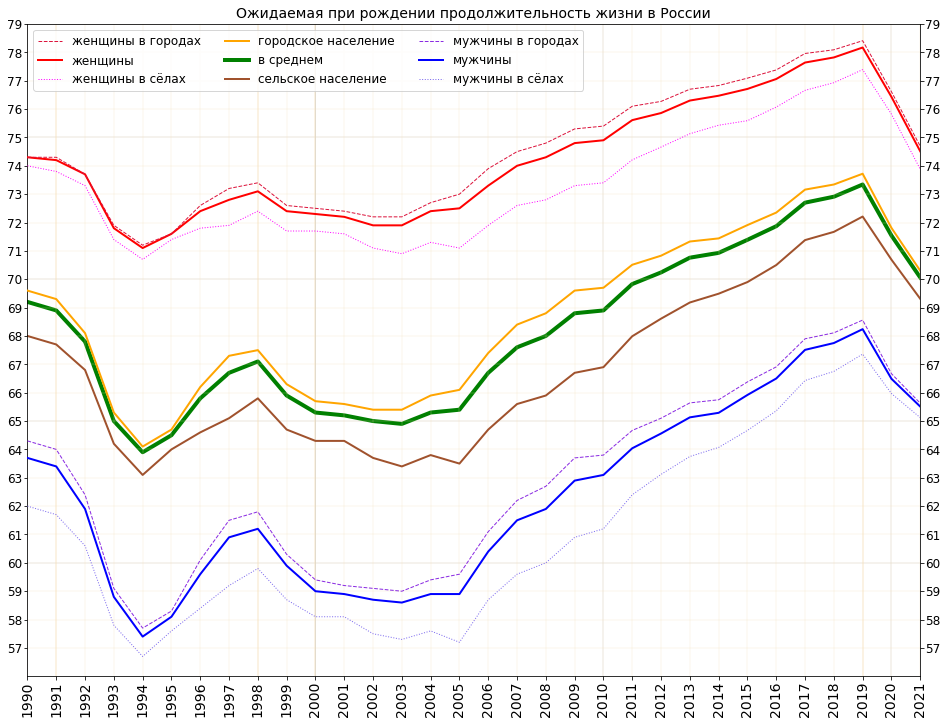

In [13]:
region_name = RegionName(nominative='Россия', genitive='России')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params=ChartParams(ylim_2=(9, 14))

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russia (by Rosstat) -v3')

<br />
<br />

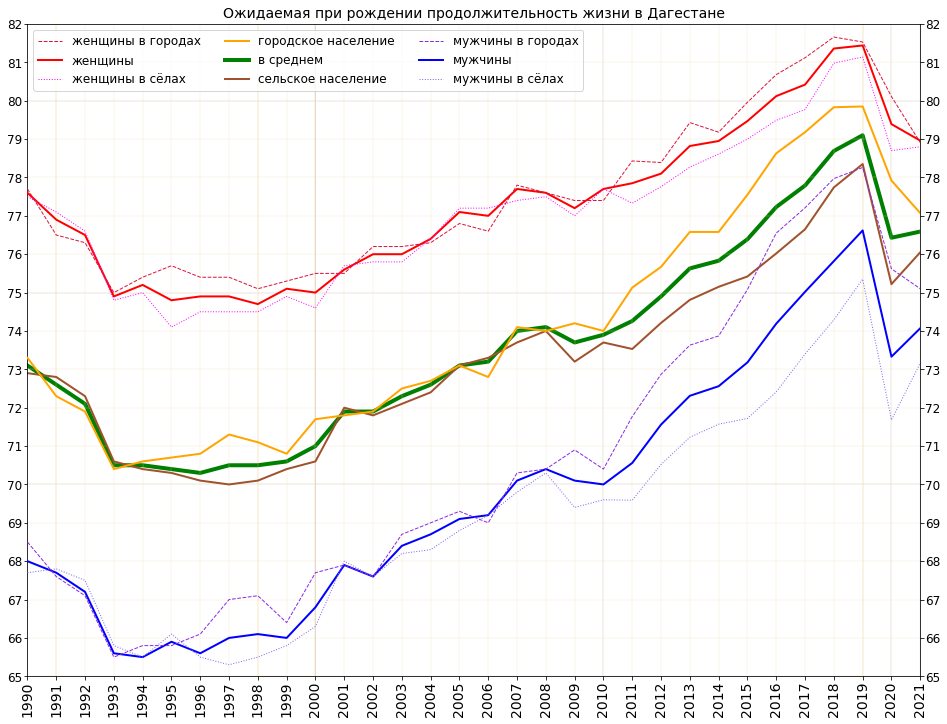

In [14]:
region_name = RegionName(nominative='Дагестан', genitive='Дагестане')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params=ChartParams(empty_labels_1_down=0, ylim_3=(-1, 4), empty_labels_3_down=0, legend_loc_3='upper left')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Dagestan')

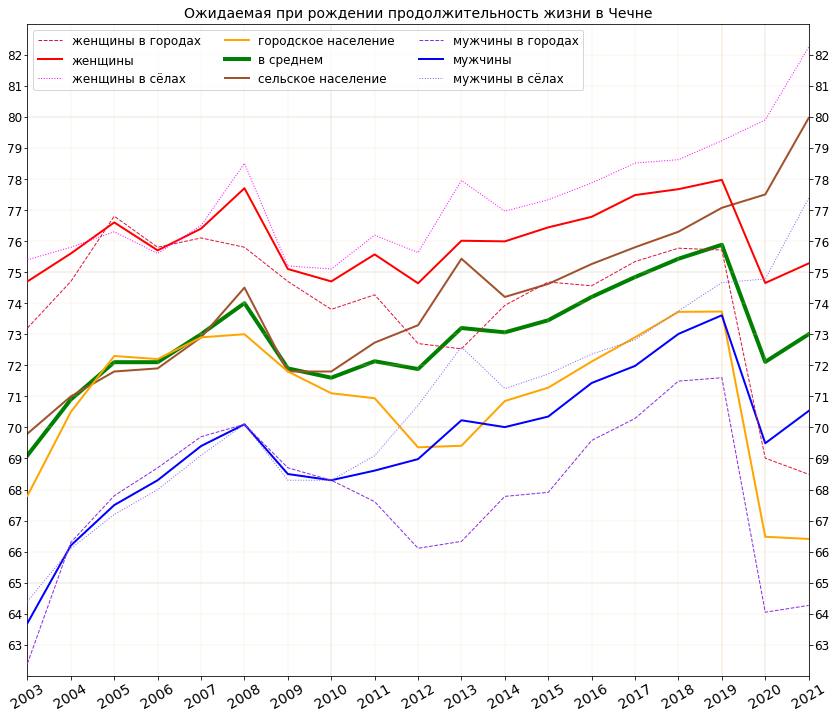

In [15]:
region_name = RegionName(nominative='Чечня', genitive='Чечне')
year_start = 2003

if CHART_COMPLEXITY == 'simple':
    figure_size = (14, 12)
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = (13, 15)
    
chart_params = ChartParams(empty_labels_1_up=1, legend_loc_3='lower left', empty_labels_3_down=0,
                           label_x_rotation=30)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   year_start=year_start, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Chechnya')

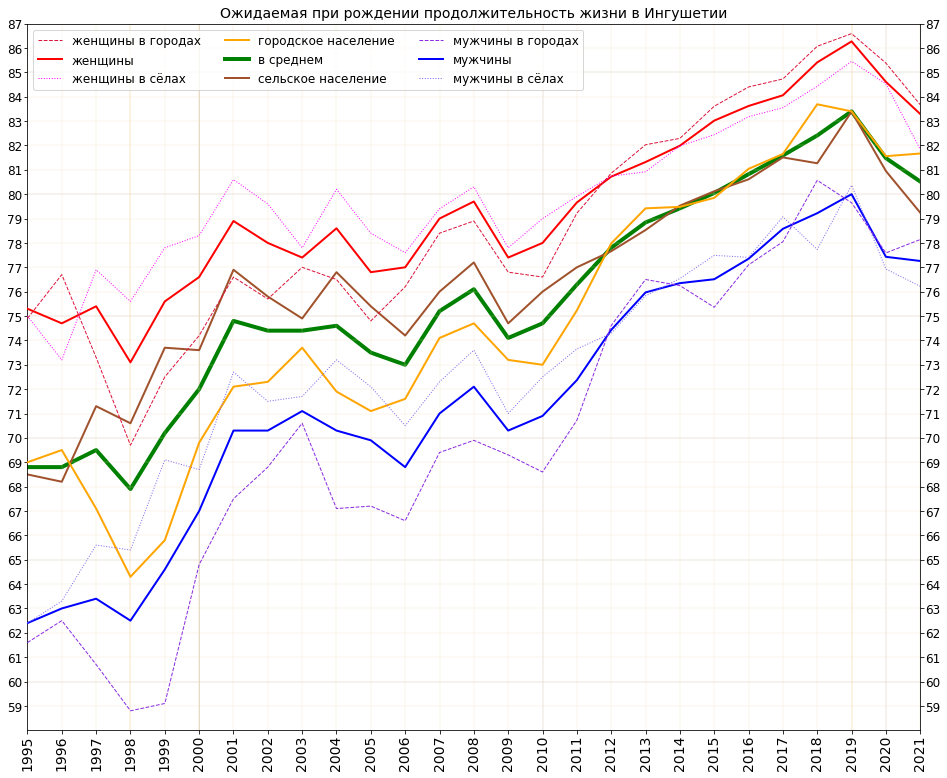

In [16]:
region_name = RegionName(nominative='Ингушетия', genitive='Ингушетии')
year_start = 1995

if CHART_COMPLEXITY == 'simple':
    figure_size = (16, 13)
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = (15, 18)

chart_params = ChartParams(empty_labels_2_up=1, legend_loc_3='lower right', empty_labels_3_down=0)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   year_start=year_start, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Ingushetia')

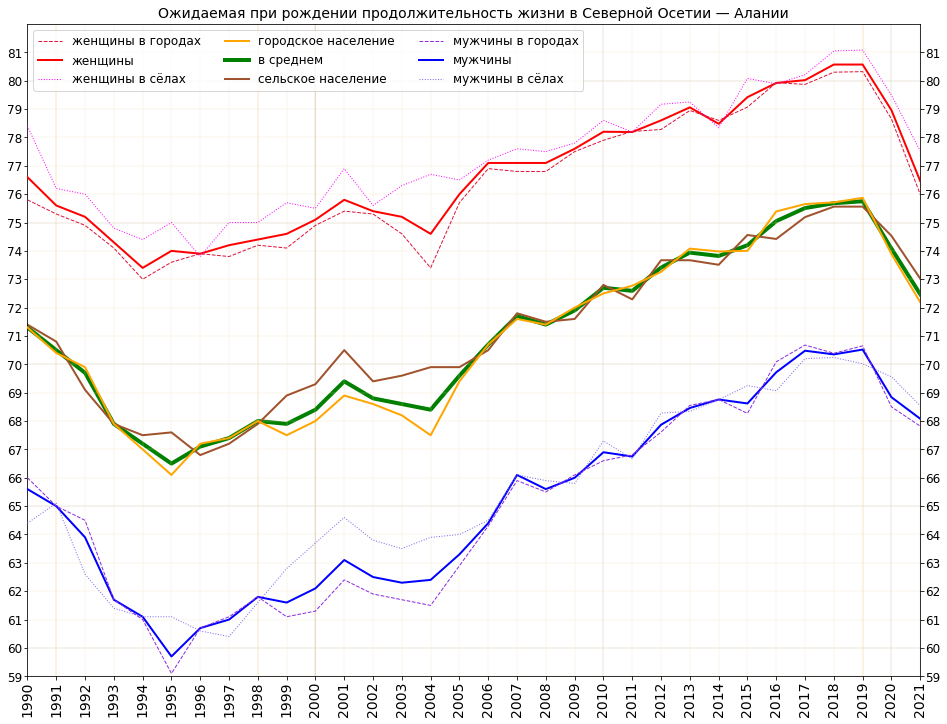

In [17]:
region_name = RegionName(nominative='Северная Осетия', genitive='Северной Осетии — Алании')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_down=0, empty_labels_1_up=1, ylim_3=(-5, 2), legend_loc_3='lower right', empty_labels_3_down=2)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -North Ossetia')

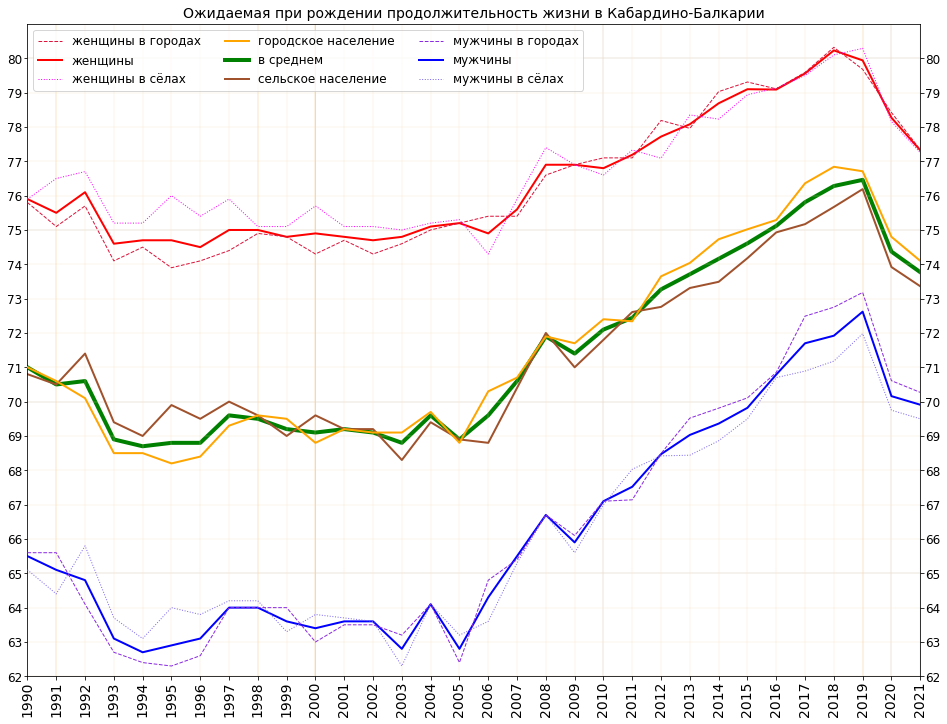

In [18]:
region_name = RegionName(nominative='Кабардино-Балкария', genitive='Кабардино-Балкарии')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_down=0, empty_labels_1_up=1, ylim_3=(-4, 2), legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Kabardino-Balkaria')

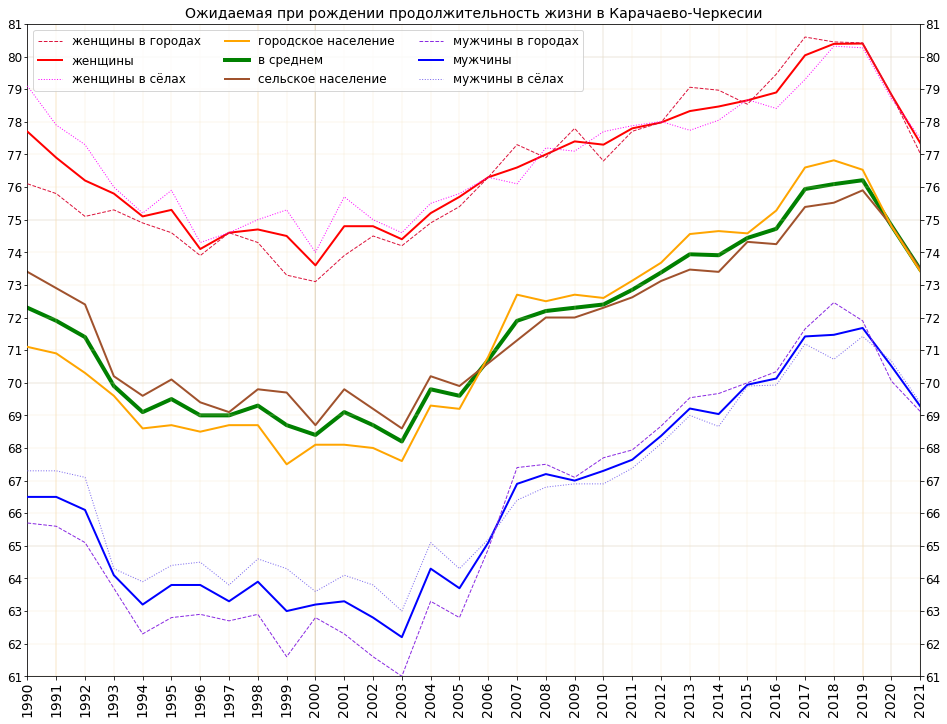

In [19]:
region_name = RegionName(nominative='Карачаево-Черкесия', genitive='Карачаево-Черкесии')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_down=0, ylim_2=(8, 14), empty_labels_2_up=1,
                           ylim_3=(-4, 2), legend_loc_3='lower right', empty_labels_3_down=1)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Karachay-Cherkessia')

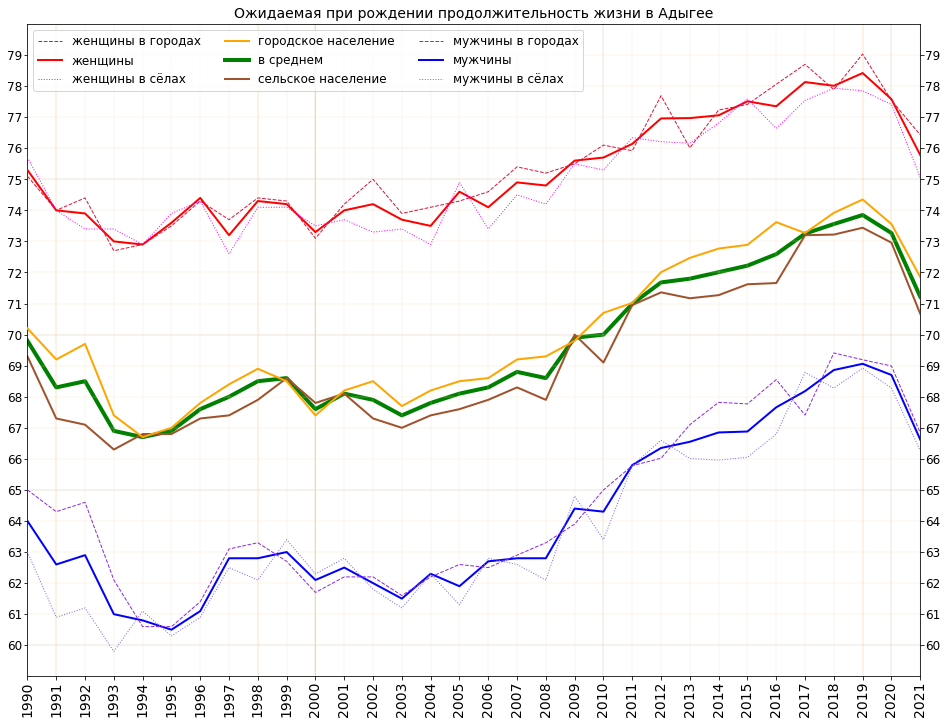

In [20]:
region_name = RegionName(nominative='Адыгея', genitive='Адыгее')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_up=1, ylim_3=(-4, 4), legend_loc_3='lower left', empty_labels_3_down=3)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Adygea')

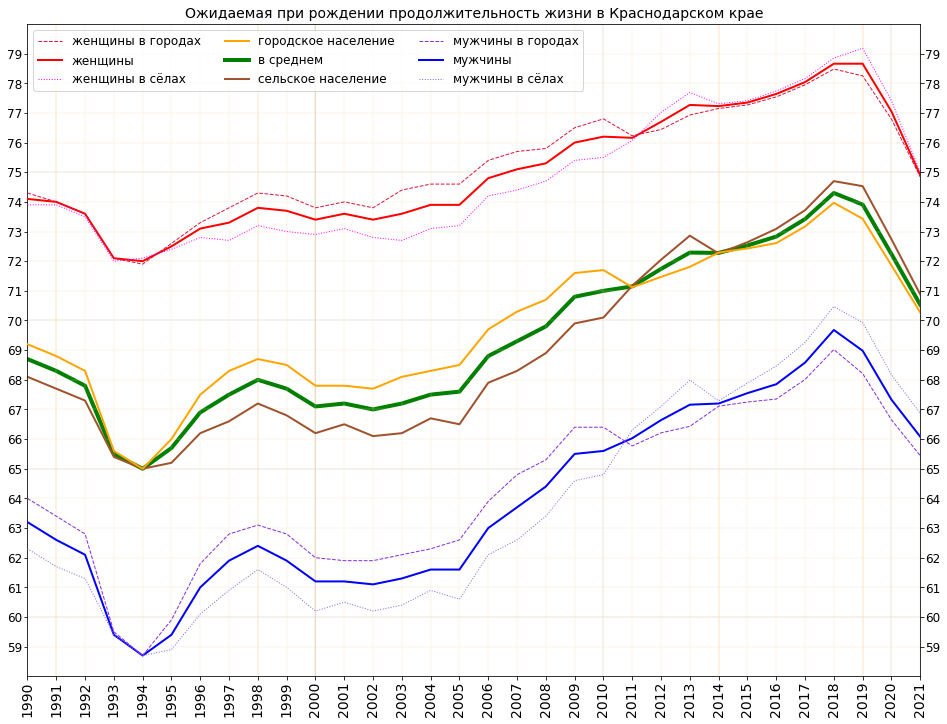

In [21]:
region_name = RegionName(nominative='Краснодарский край', genitive='Краснодарском крае')
hor_lines = [1991, 1998, 2000, 2014, 2019]


if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_up=1, ylim_3=(-4, 3), legend_loc_3='lower left', empty_labels_3_down=2)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Krasnodar Krai')

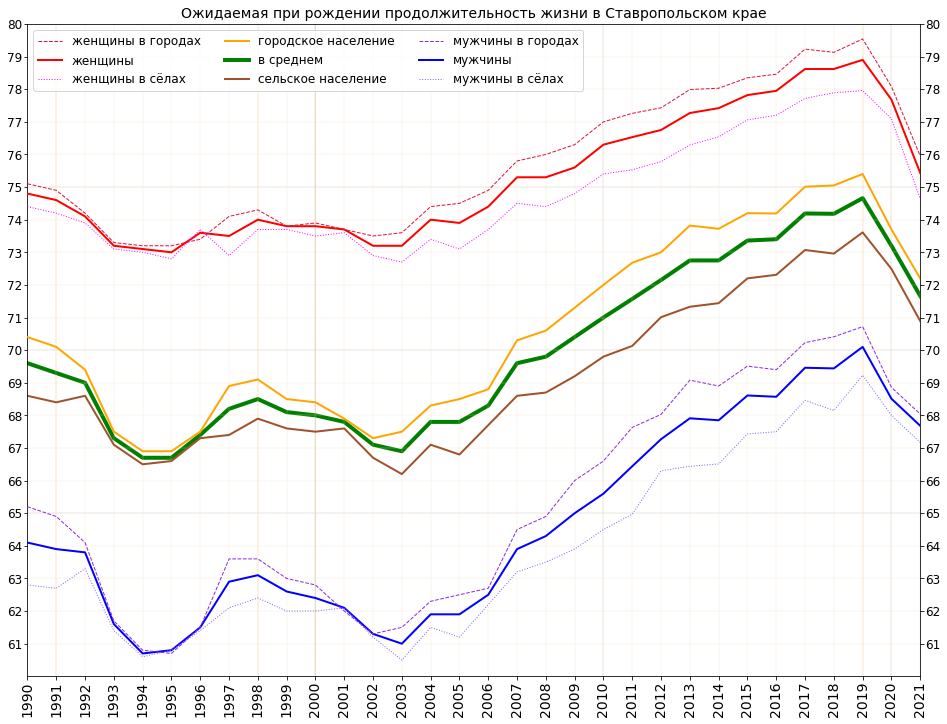

In [22]:
region_name = RegionName(nominative='Ставропольский край', genitive='Ставропольском крае')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_3=(-2, 3), legend_loc_3='lower right', empty_labels_3_down=2)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Stavropol Krai')

<br />
<br />

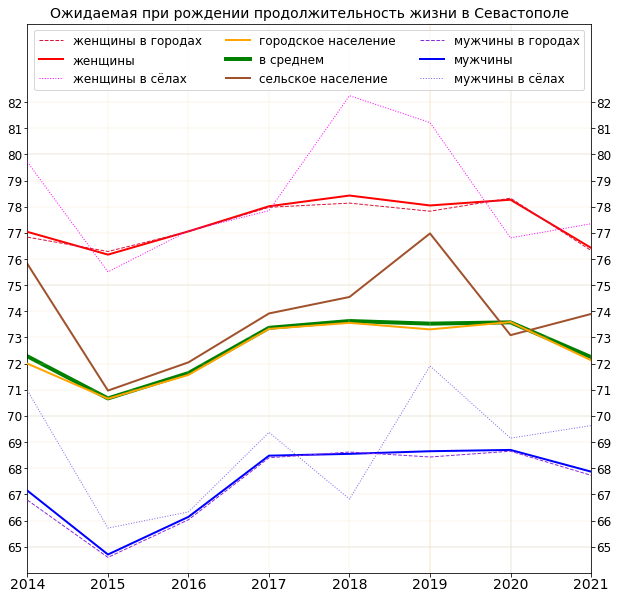

In [23]:
region_name = RegionName(nominative='Севастополь', genitive='Севастополе')
year_start = 2014
hor_lines = [2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = (10.1, 10.1)
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = (8.5, 15)

chart_params = ChartParams(ylim_1=(64, 85), empty_labels_1_up=3, legend_loc_1='upper center' if LANG=='ru' else 'upper center',
                           empty_labels_2_up=1, ylim_3=(-7, 2), empty_labels_3_down=3, legend_loc_3='lower right',
                           label_x_rotation='horizontal')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   year_start=year_start, hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Sevastopol')

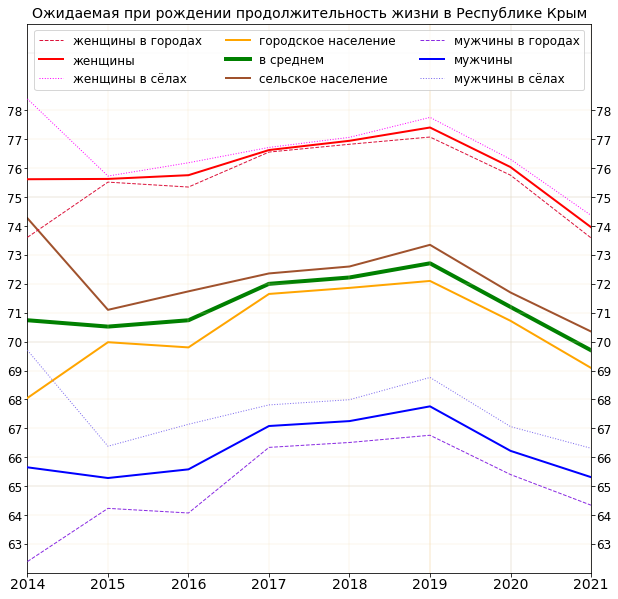

In [24]:
region_name = RegionName(nominative='Республика Крым', genitive='Республике Крым')
year_start = 2014
hor_lines = [2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = (10.1, 10.1)

elif CHART_COMPLEXITY == 'with_differences':
    figure_size = (8.5, 15)

chart_params = ChartParams(ylim_1=(62, 81), empty_labels_1_up=3, legend_loc_1='upper center' if LANG=='ru' else 'upper center',
                           empty_labels_2_up=1, ylim_3=(-8, 0), empty_labels_3_down=0, legend_loc_3='lower right',
                           label_x_rotation='horizontal')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   year_start=year_start, hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Republic of Crimea')

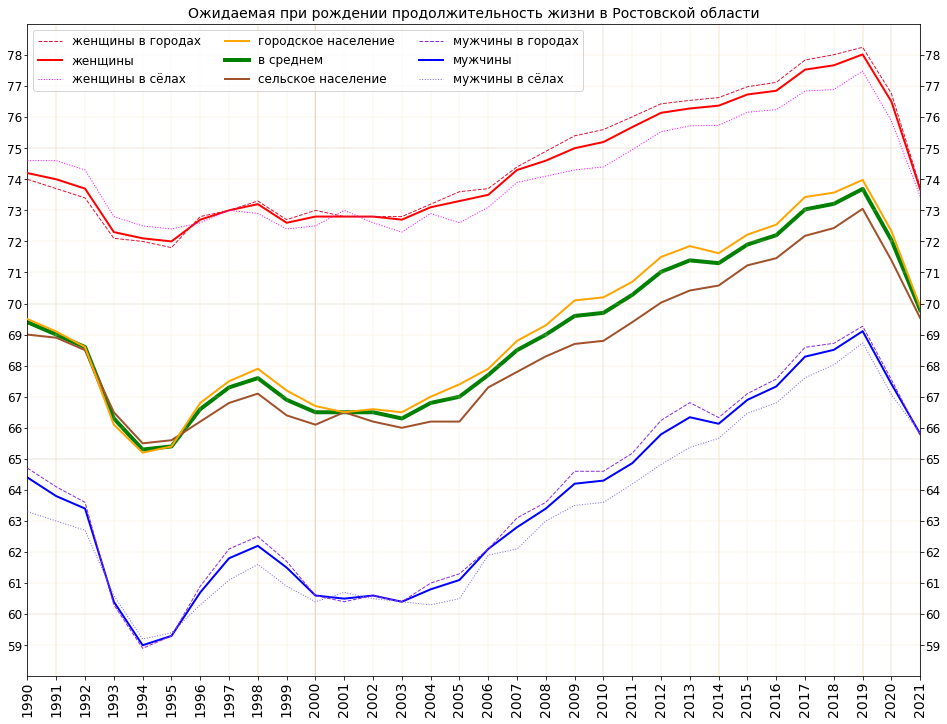

In [25]:
region_name = RegionName(nominative='Ростовская область', genitive='Ростовской области')
hor_lines = [1991, 1998, 2000, 2014, 2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_up=1, empty_labels_2_up=1, ylim_2=(8, 14), legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Rostov Oblast')

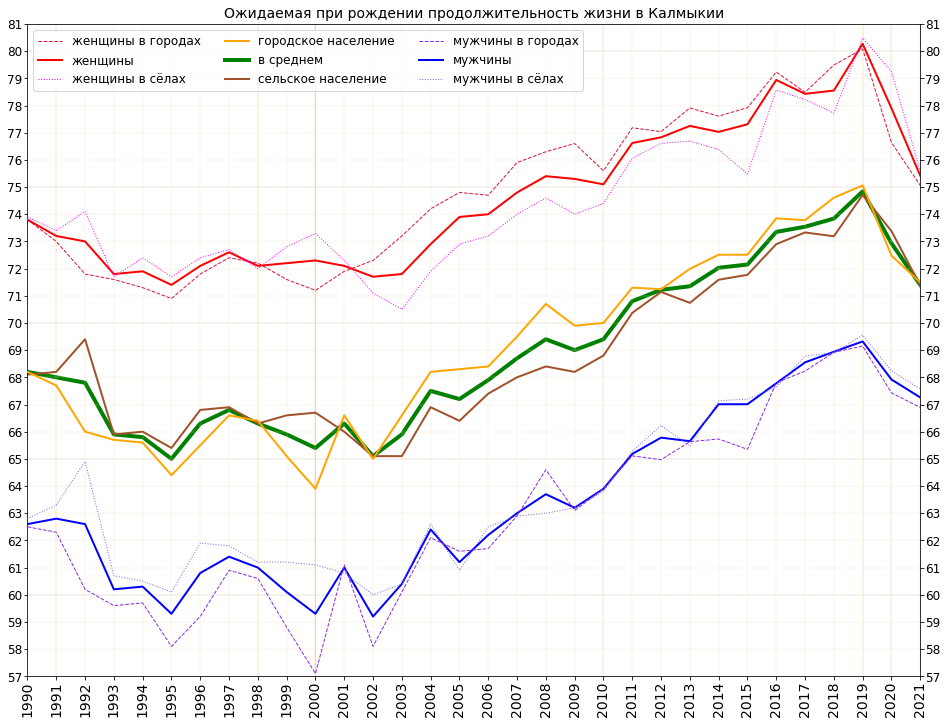

In [26]:
region_name = RegionName(nominative='Калмыкия', genitive='Калмыкии')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_down=0, empty_labels_2_up=1, ylim_3=(-6, 3), legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Kalmykia')

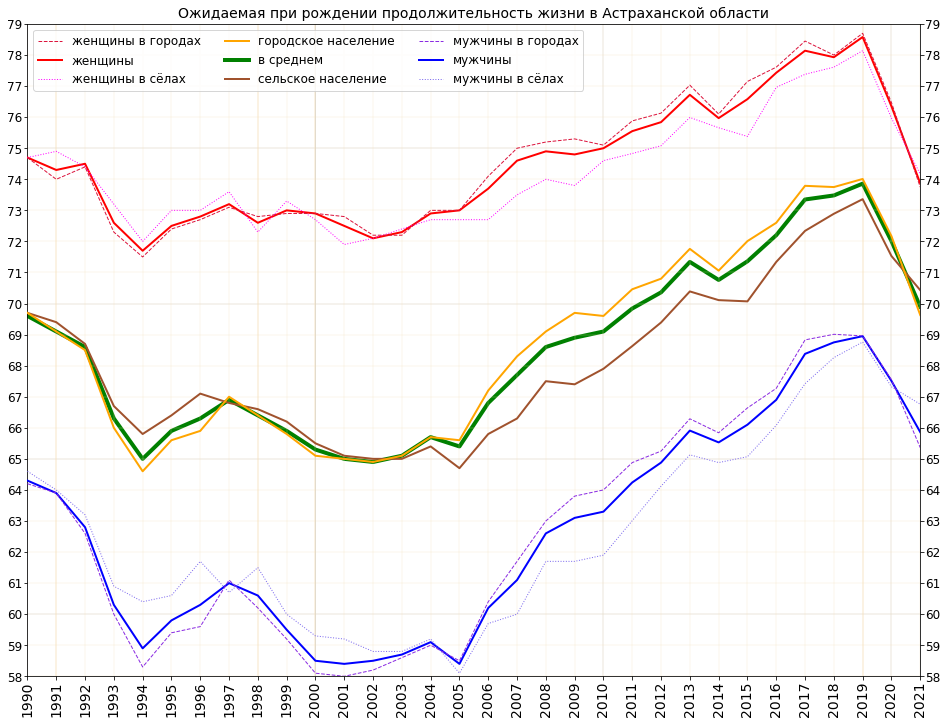

In [27]:
region_name = RegionName(nominative='Астраханская область', genitive='Астраханской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams( empty_labels_1_down=0, ylim_3=(-4, 3), legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Astrakhan Oblast')

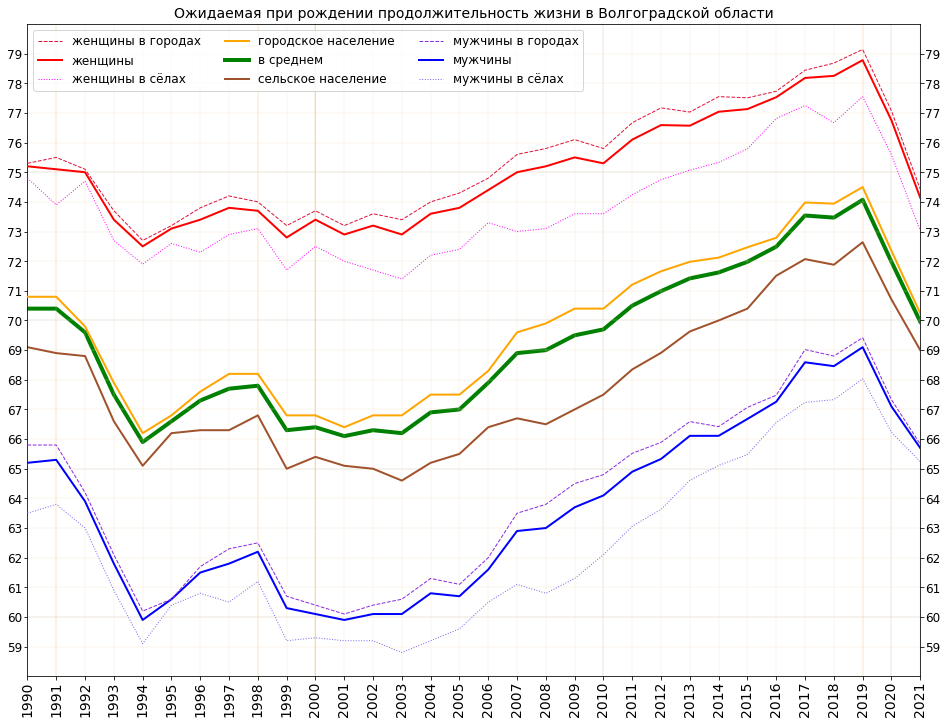

In [28]:
region_name = RegionName(nominative='Волгоградская область', genitive='Волгоградской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_up=1, ylim_2=(8, 14), empty_labels_2_up=1)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Volgograd Oblast')

<br />
<br />

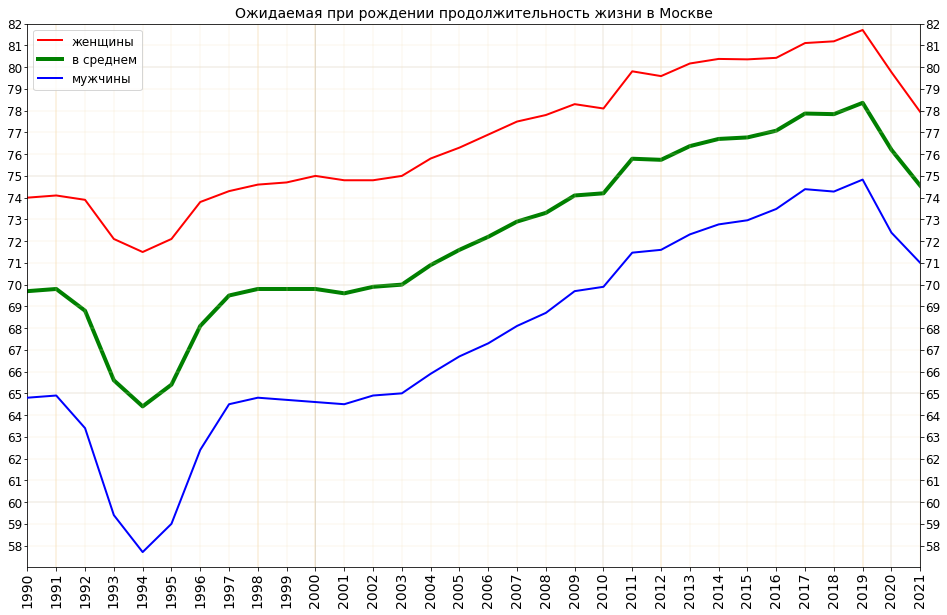

In [29]:
region_name = RegionName(nominative='Москва', genitive='Москве')
chart_shown_data = 'only_gender'
hor_lines = [1991, 1998, 2000, 2012, 2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = (16, 10)
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = (14, 11)

chart_params = ChartParams(legend_loc_2='lower left')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, chart_shown_data=chart_shown_data,
                   figure_size=figure_size, hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Moscow')

# В 2012 году территория Москвы была расширена за счёт передачи региону значительной части Московской области с населением около 230 тысяч человек
# (с более низкой продолжительностью жизни), что отразилась на среднестатистической продолжительности жизни в регионе Москва.

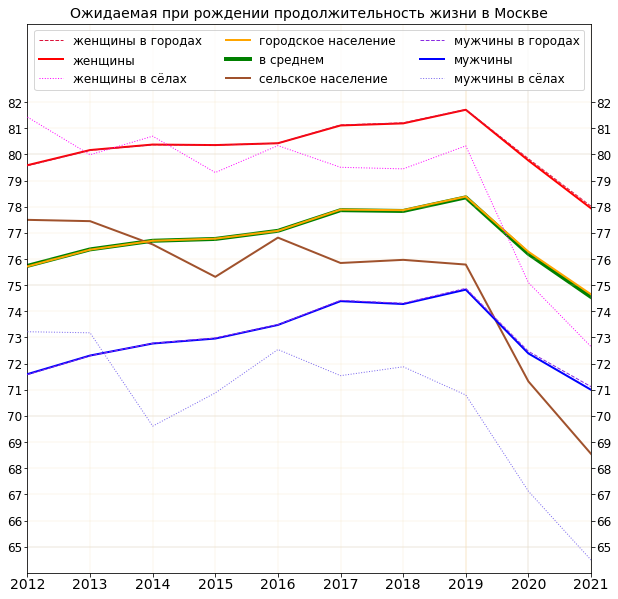

In [30]:
region_name = RegionName(nominative='Москва', genitive='Москве')
year_start = 2012
hor_lines = [2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = (10.1, 10.1)
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = (8.5, 14)

chart_params = ChartParams(ylim_1=(64, 85), empty_labels_1_up=3, legend_loc_1='upper center' if LANG=='ru' else 'upper center',
                           empty_labels_2_up=1, legend_loc_3='lower right',
                           label_x_rotation='horizontal')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   year_start=year_start, hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Moscow (after expansion)')

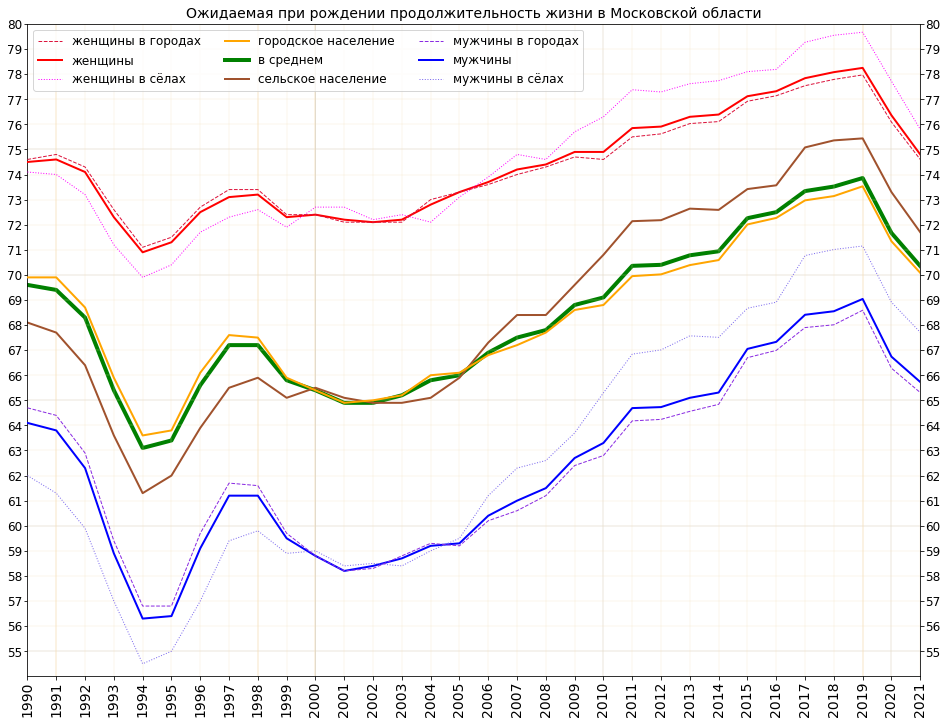

In [31]:
region_name = RegionName(nominative='Московская область', genitive='Московской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_2_up=1, ylim_3=(-5, 3), legend_loc_3='lower left')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Moscow Oblast')

# В 2012 году значительная часть территории Московской области с населением около 230 тысяч человек была передана Москве.
# Но это не должно было заметно сказаться на общей средней продолжительности жизни в Московской области.

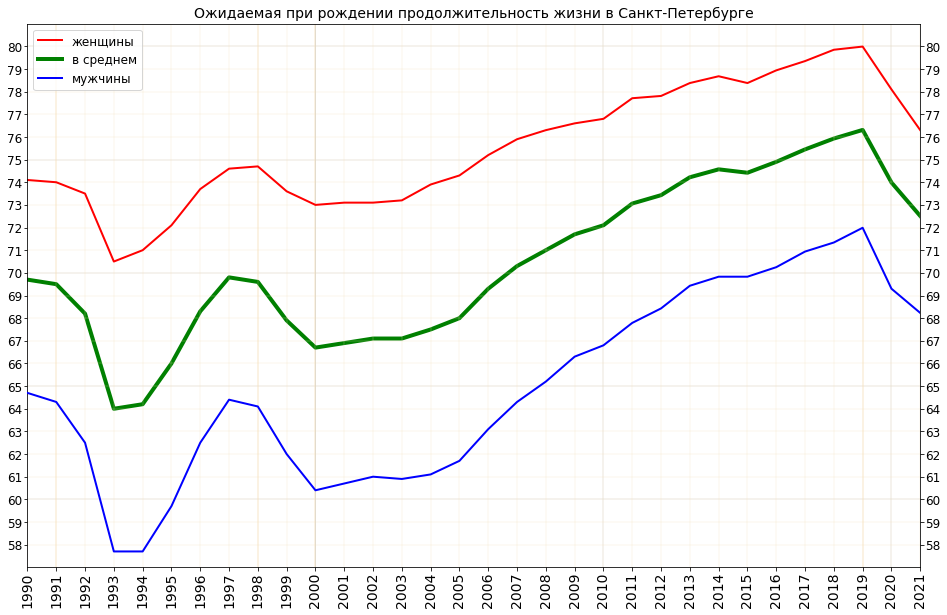

In [32]:
region_name = RegionName(nominative='Санкт-Петербург', genitive='Санкт-Петербурге')
chart_shown_data = 'only_gender'

if CHART_COMPLEXITY == 'simple':
    figure_size = (16, 10)
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = (14, 11)

chart_params = ChartParams(ylim_1 = (57, 81), empty_labels_1_up=1)
    
_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, chart_shown_data=chart_shown_data,
                   figure_size=figure_size, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Saint Petersburg')

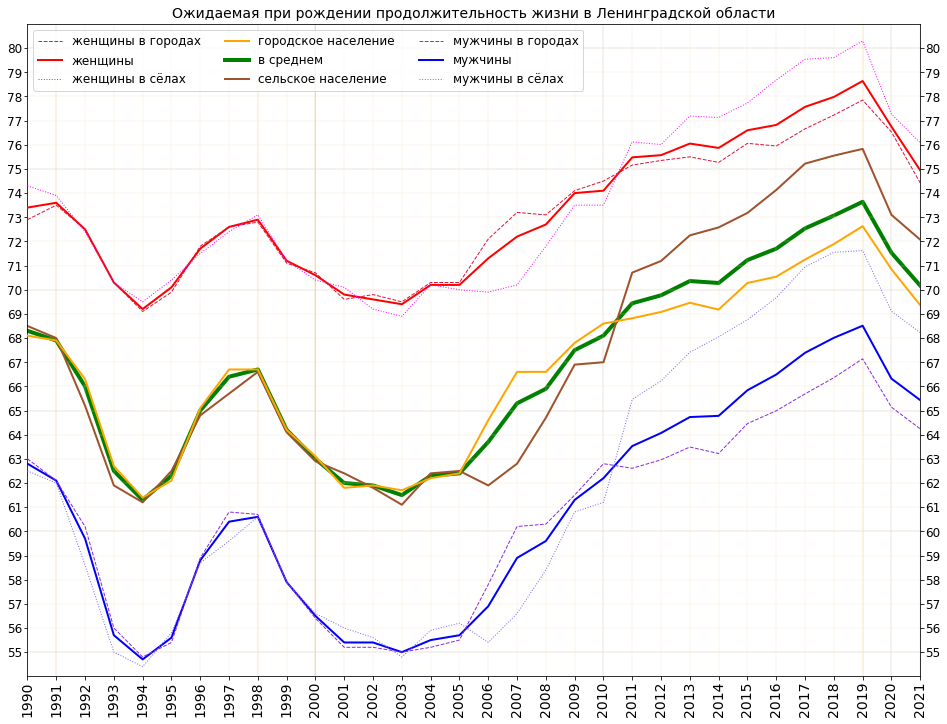

In [33]:
region_name = RegionName(nominative='Ленинградская область', genitive='Ленинградской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_up=1, ylim_2 = (8, 16), empty_labels_2_up=1, ylim_3 = (-6, 4),
                           legend_loc_3='lower left', empty_labels_3_down=1)
# empty_labels_2_up=1, ylim_3=(-5, 4), legend_loc_3='lower left'
_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Leningrad Oblast')

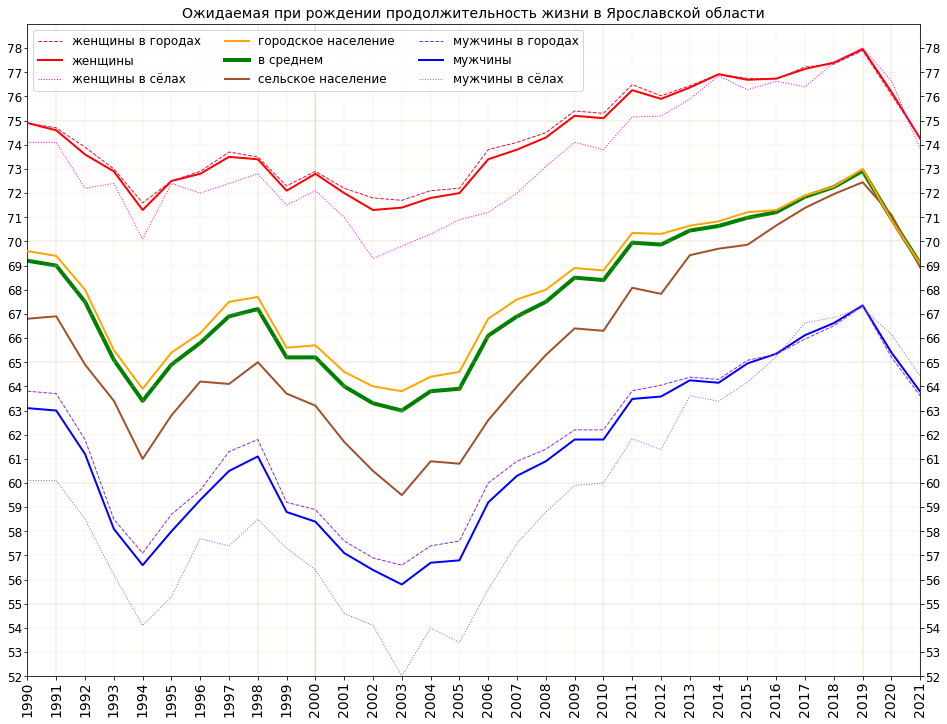

In [34]:
region_name = RegionName(nominative='Ярославская область', genitive='Ярославской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_down=0, empty_labels_1_up=1, ylim_3=(-4, 5), empty_labels_3_down=3)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Yaroslavl Oblast')

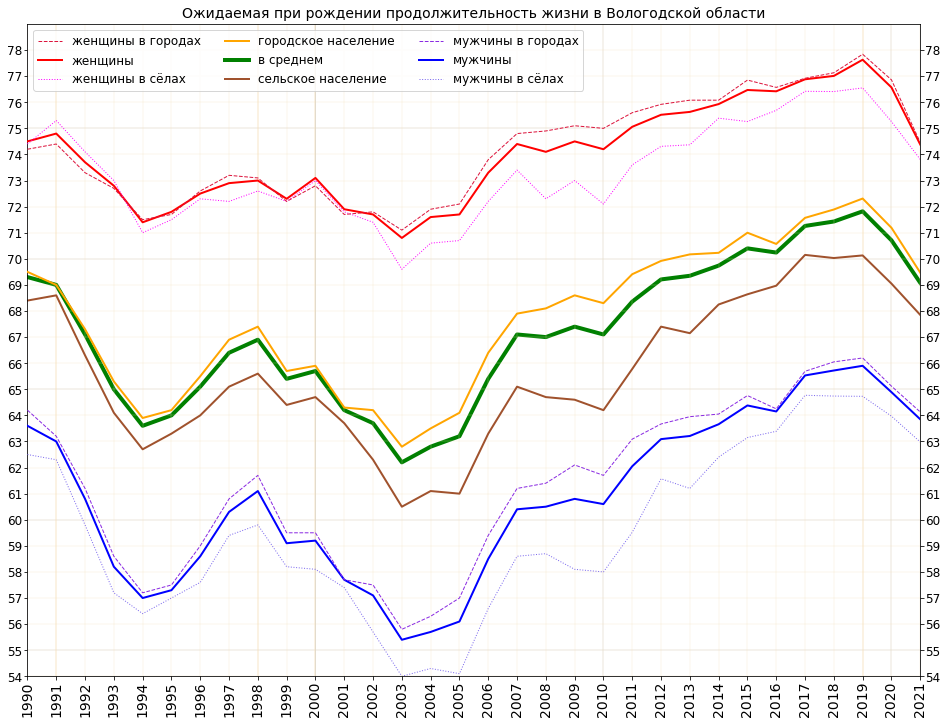

In [35]:
region_name = RegionName(nominative='Вологодская область', genitive='Вологодской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(54, 79), empty_labels_1_down=0, empty_labels_1_up=1,
                           empty_labels_2_up=1, legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Vologda Oblast')

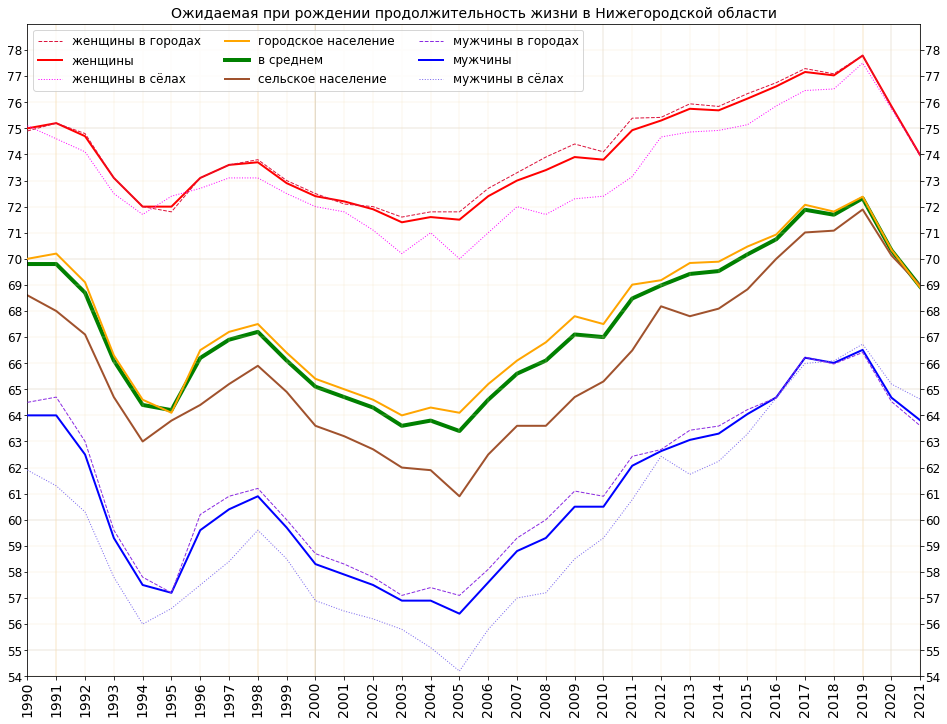

In [36]:
region_name = RegionName(nominative='Нижегородская область', genitive='Нижегородской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(54, 79), empty_labels_1_down=0, empty_labels_1_up=1,
                           ylim_3=(-4, 4), empty_labels_3_down=3)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Nizhny Novgorod Oblast')

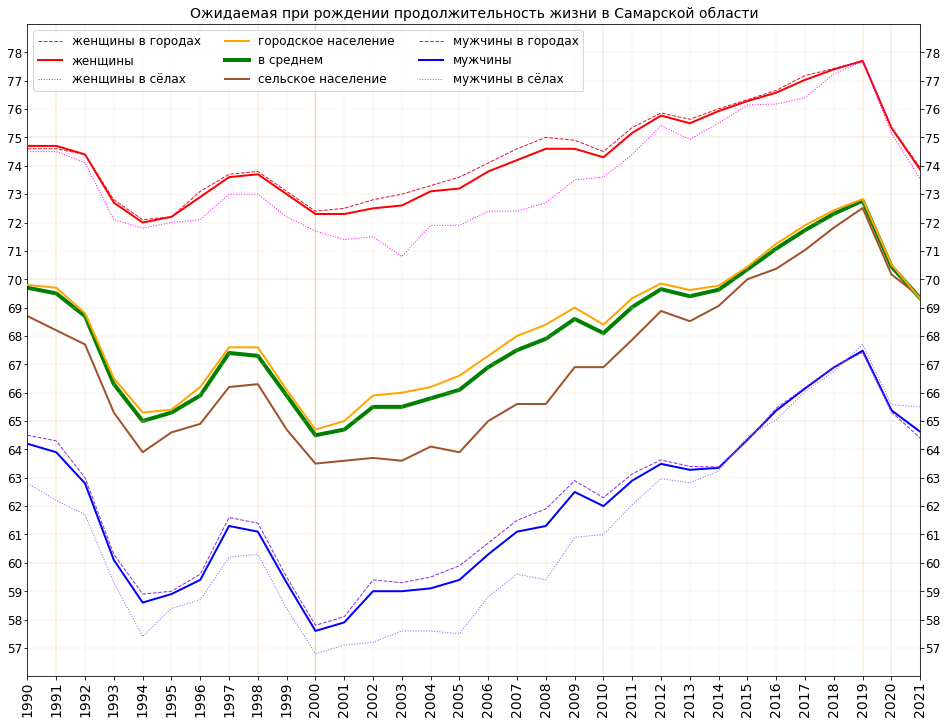

In [37]:
region_name = RegionName(nominative='Самарская область', genitive='Самарской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(56, 79), empty_labels_1_up=1, ylim_3=(-3, 3))

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Samara Oblast')

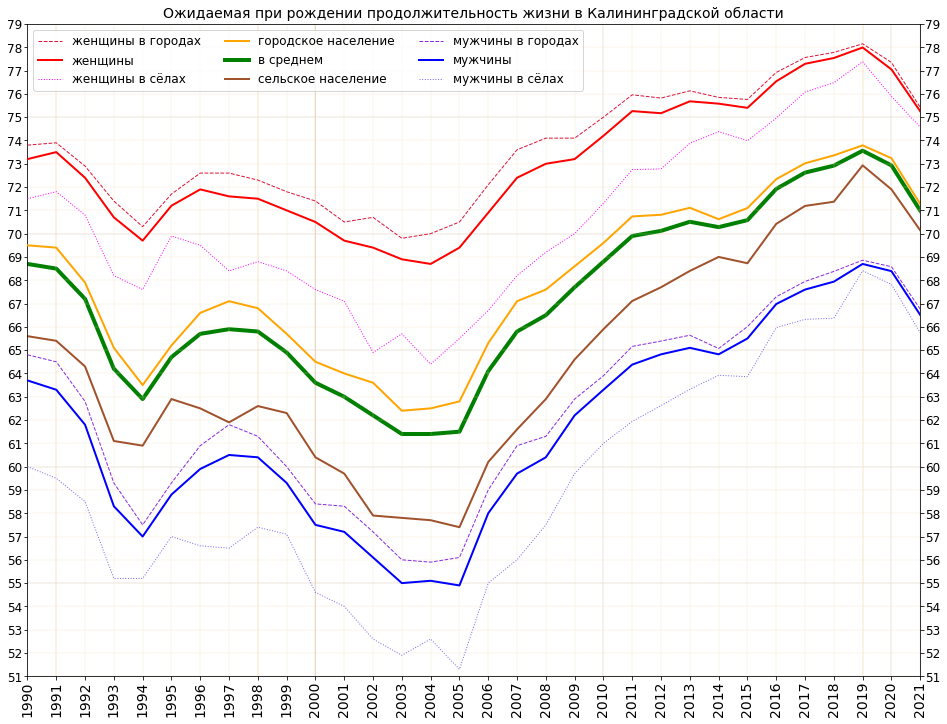

In [38]:
region_name = RegionName(nominative='Калининградская область', genitive='Калининградской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_down=0, legend_loc_3='lower left')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Kaliningrad Oblast')

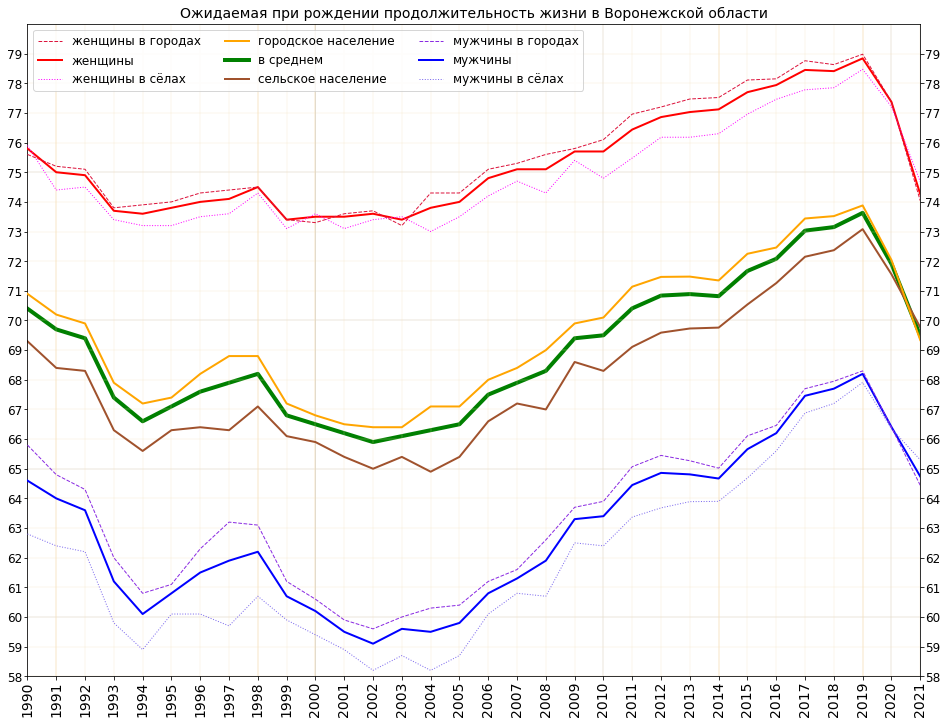

In [39]:
region_name = RegionName(nominative='Воронежская область', genitive='Воронежской области')
hor_lines = [1991, 1998, 2000, 2014, 2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(58, 80), empty_labels_1_up=1, empty_labels_1_down=0, empty_labels_2_up=1,
                           ylim_3=(-4, 4), empty_labels_3_down=3, legend_loc_3='lower left')
    
_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Voronezh Oblast')

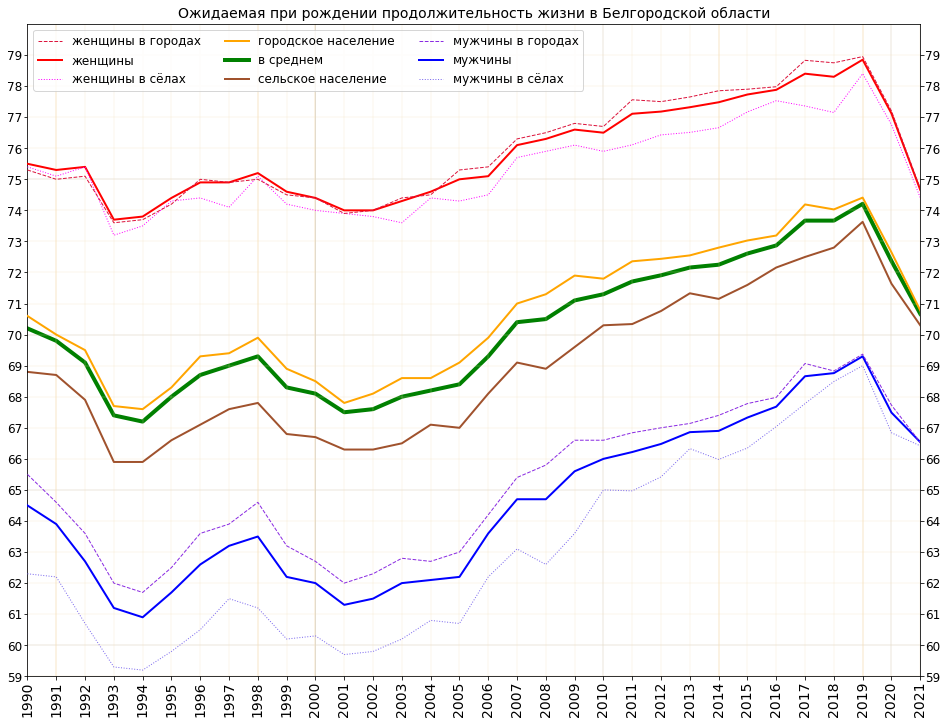

In [40]:
region_name = RegionName(nominative='Белгородская область', genitive='Белгородской области')
hor_lines = [1991, 1998, 2000, 2014, 2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(59, 80), empty_labels_1_up=1, empty_labels_1_down=0, ylim_2=(8, 15), empty_labels_2_up=1,
                           ylim_3=(-3, 4), empty_labels_3_down=3, legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Belgorod Oblast')

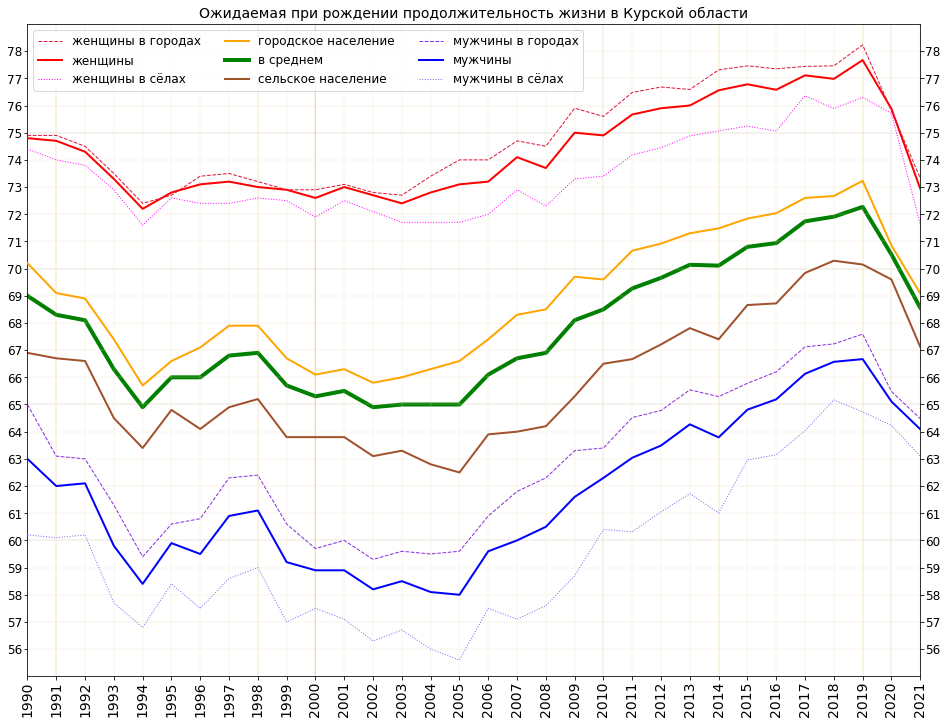

In [41]:
region_name = RegionName(nominative='Курская область', genitive='Курской области')
hor_lines = [1991, 1998, 2000, 2014, 2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_up=1, ylim_2=(9, 17), empty_labels_2_up=1,
                           ylim_3=(-3, 5), empty_labels_3_down=3, legend_loc_3='lower left')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Kursk Oblast')

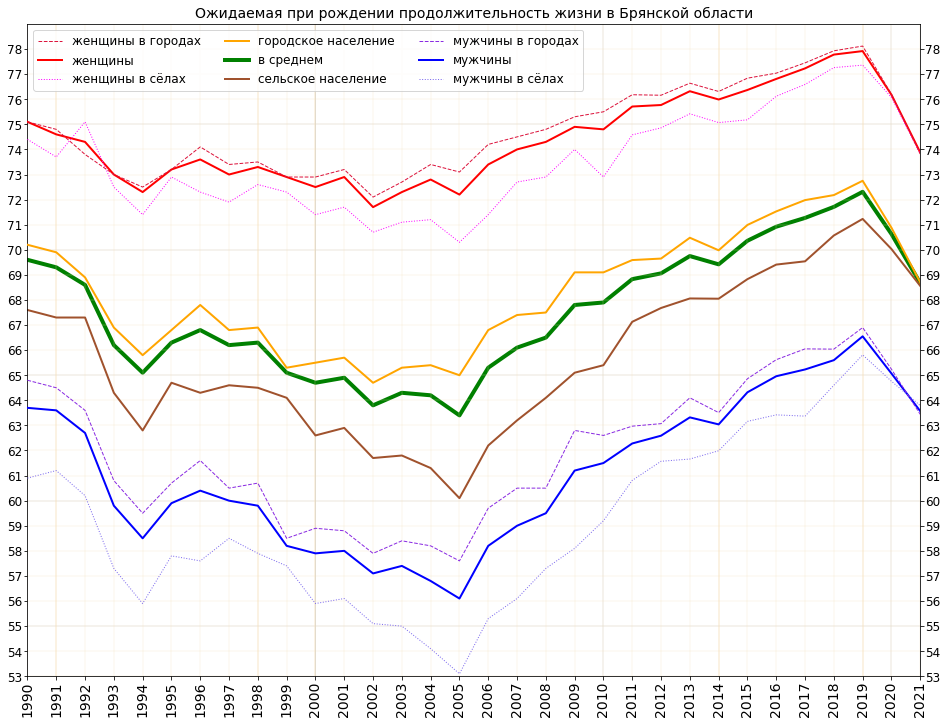

In [42]:
region_name = RegionName(nominative='Брянская область', genitive='Брянской области')
hor_lines = [1991, 1998, 2000, 2014, 2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_down=0, empty_labels_1_up=1, empty_labels_2_up=1, ylim_3=(-3, 5))

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Bryansk Oblast')

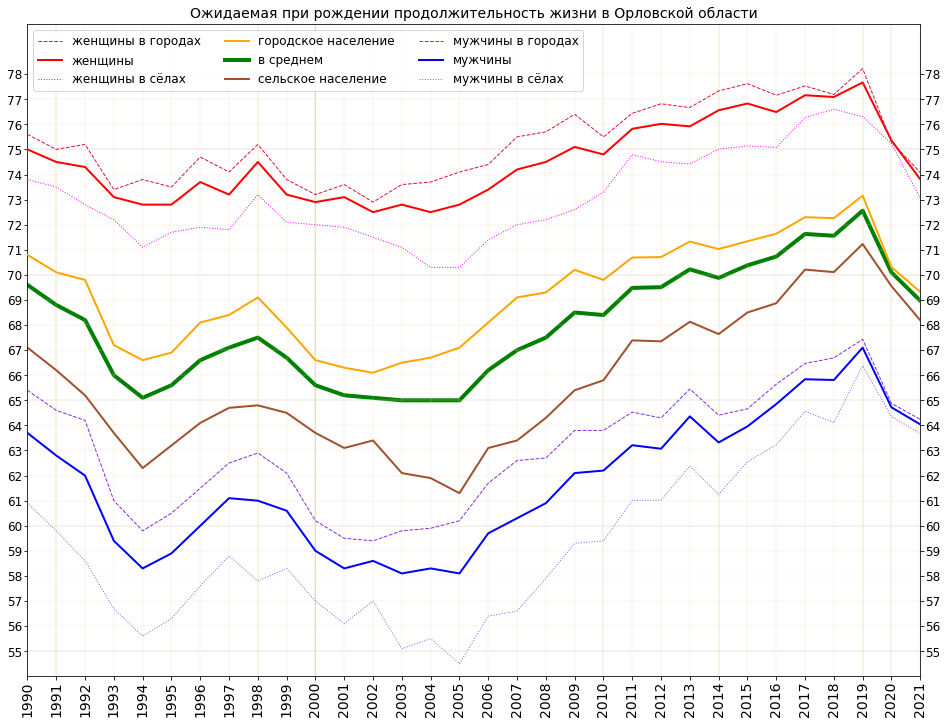

In [43]:
region_name = RegionName(nominative='Орловская область', genitive='Орловской области')
hor_lines = [1991, 1998, 2000, 2014, 2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
    chart_params = ChartParams(ylim_1=(54, 80), empty_labels_1_up=2)
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF
    chart_params = ChartParams(empty_labels_1_up=1, ylim_2=(10, 16), legend_loc_3='lower left')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Oryol  Oblast')

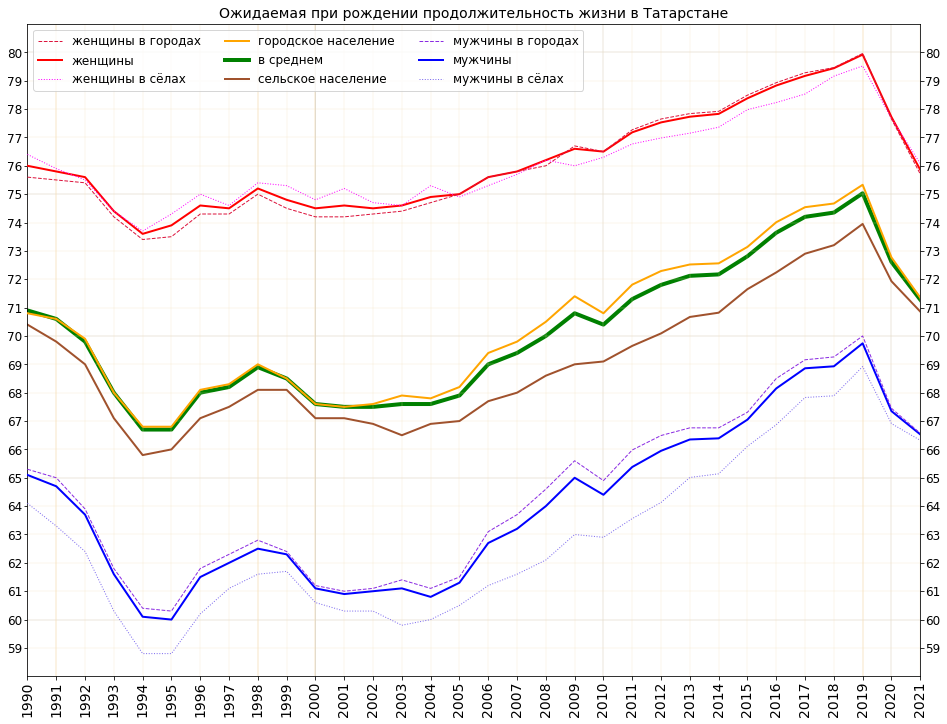

In [44]:
region_name = RegionName(nominative='Татарстан', genitive='Татарстане')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(58, 81), empty_labels_1_up=1, empty_labels_2_up=1,
                           ylim_3=(-4, 3), empty_labels_3_down=3, legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Tatarstan')

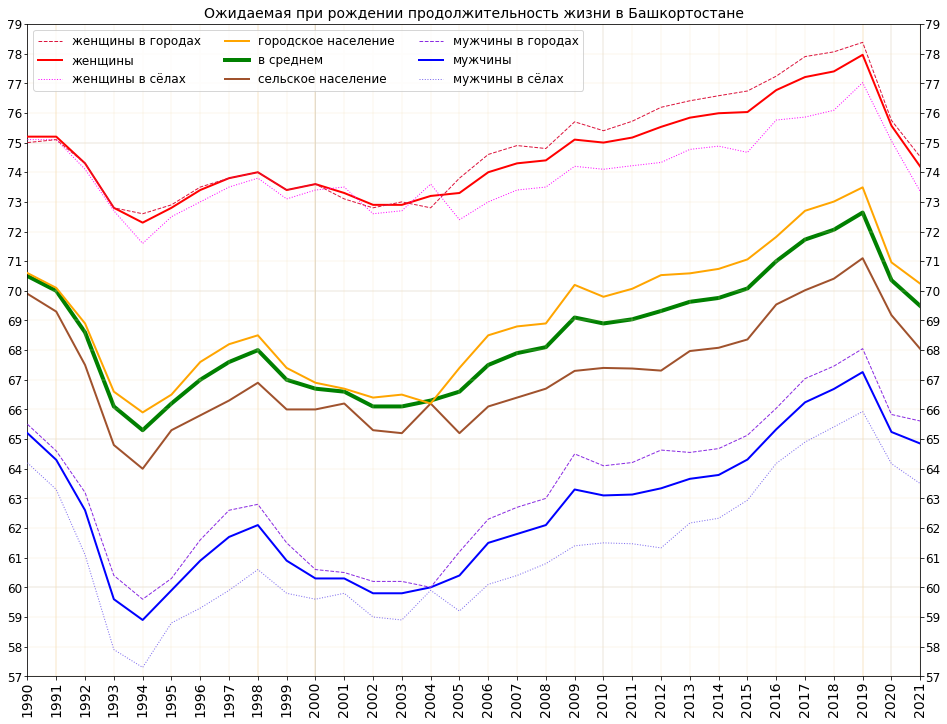

In [45]:
region_name = RegionName(nominative='Башкортостан', genitive='Башкортостане')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_down=0, ylim_2=(9, 15), legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Bashkortostan')

<br />
<br />

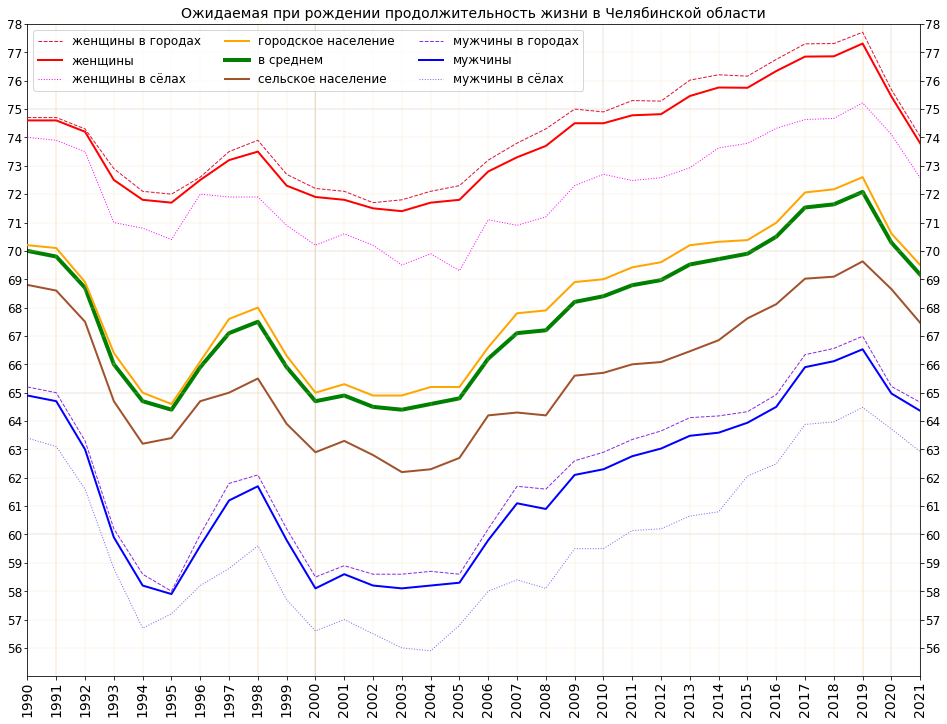

In [46]:
region_name = RegionName(nominative='Челябинская область', genitive='Челябинской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_2_up=1, legend_loc_3='lower right', ylim_3=(-2, 4), empty_labels_3_down=3)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Chelyabinsk Oblast')

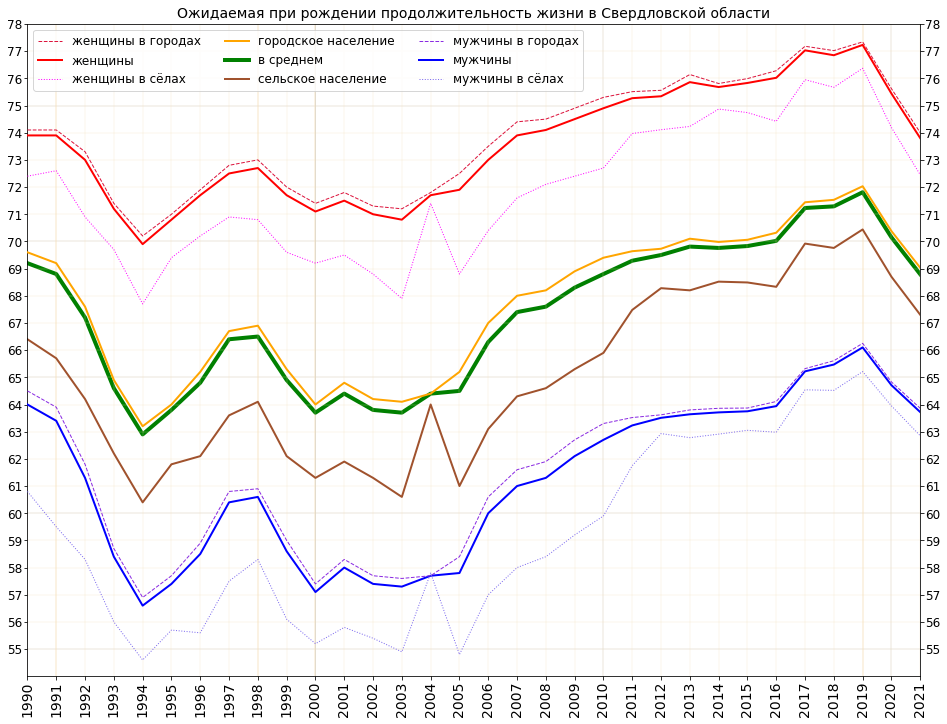

In [47]:
region_name = RegionName(nominative='Свердловская область', genitive='Свердловской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_3=(-3, 5), empty_labels_3_down=3, legend_loc_3='lower left')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Sverdlovsk Oblast')

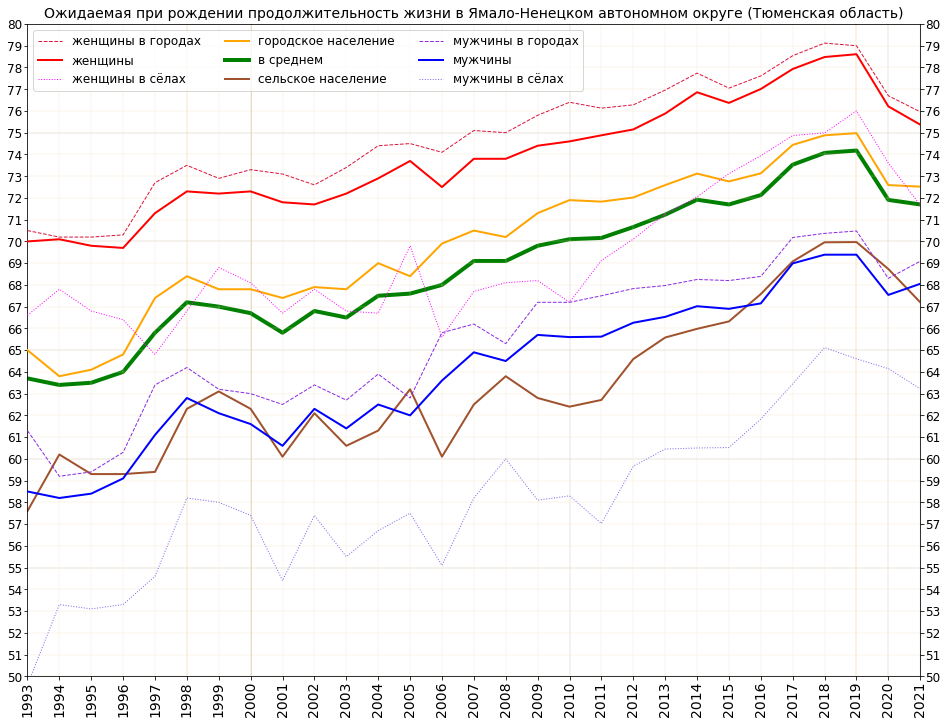

In [48]:
region_name = RegionName(nominative='Ямало-Ненецкий АО', genitive='Ямало-Ненецком автономном округе (Тюменская область)')
year_start = 1993

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(50, 80), empty_labels_1_down=0, ylim_2=(7, 17),
                           ylim_3=(0, 11), empty_labels_3_down=3)

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   year_start=year_start, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -YaNAO')

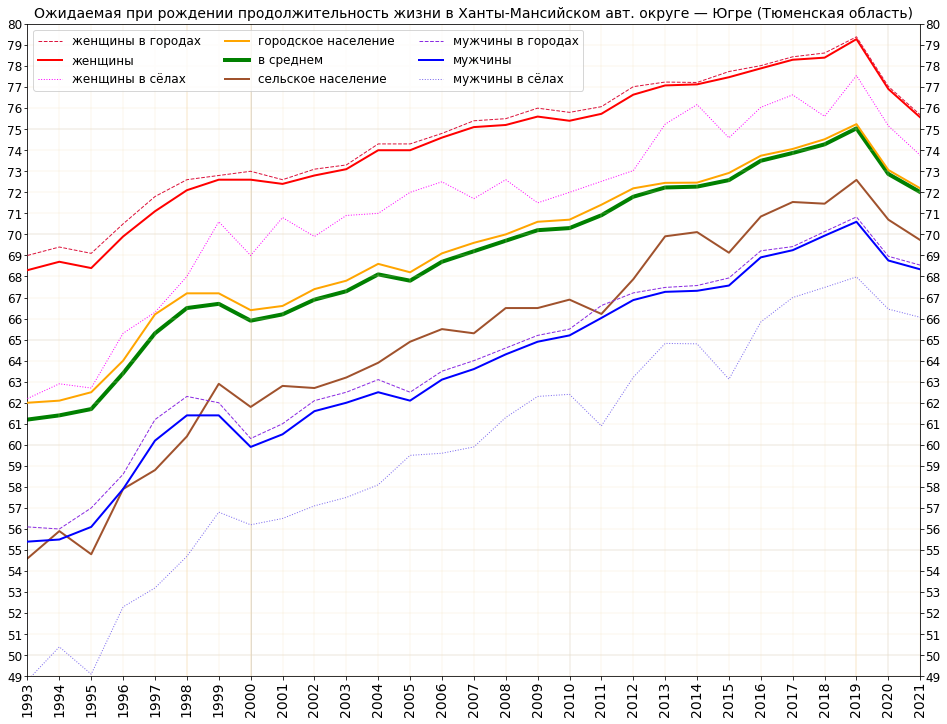

In [49]:
region_name = RegionName(nominative='Югра', genitive='Ханты-Мансийском авт. округе — Югре (Тюменская область)')
year_start = 1993

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(49, 80), empty_labels_1_down=0, empty_labels_2_up=1,
                           ylim_3=(-2, 8), empty_labels_3_down=3, legend_loc_3='lower left')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   year_start=year_start, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Yugra')

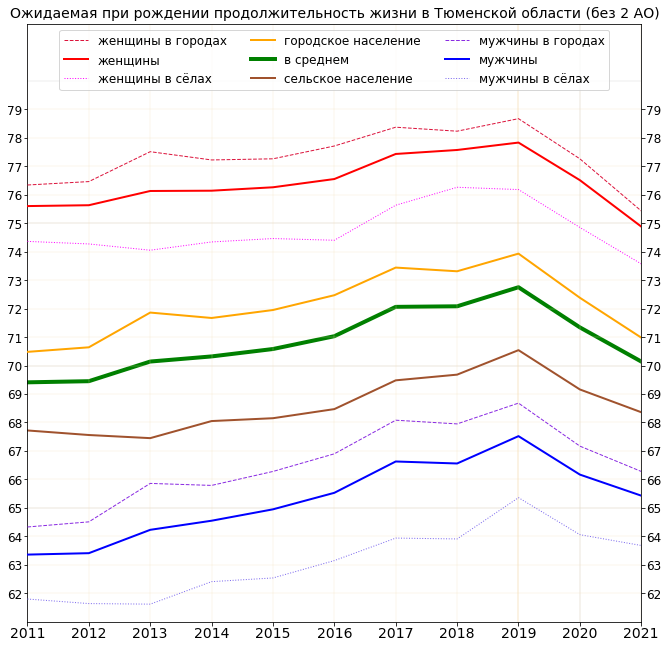

In [50]:
region_name = RegionName(nominative='Тюменская область (без 2 АО)', genitive='Тюменской области (без 2 АО)')
year_start = 2011
hor_lines = [2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = (11, 11)
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = (9.1, 14)

chart_params = ChartParams(ylim_1=(61, 82), empty_labels_1_up=3, legend_loc_1='upper center' if LANG=='ru' else 'upper left',
                           ylim_3=(-1, 5), empty_labels_3_down=3, legend_loc_3='lower left', label_x_rotation='horizontal')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   year_start=year_start, hor_lines=hor_lines, chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Tyumen Oblast (except 2 AO)')

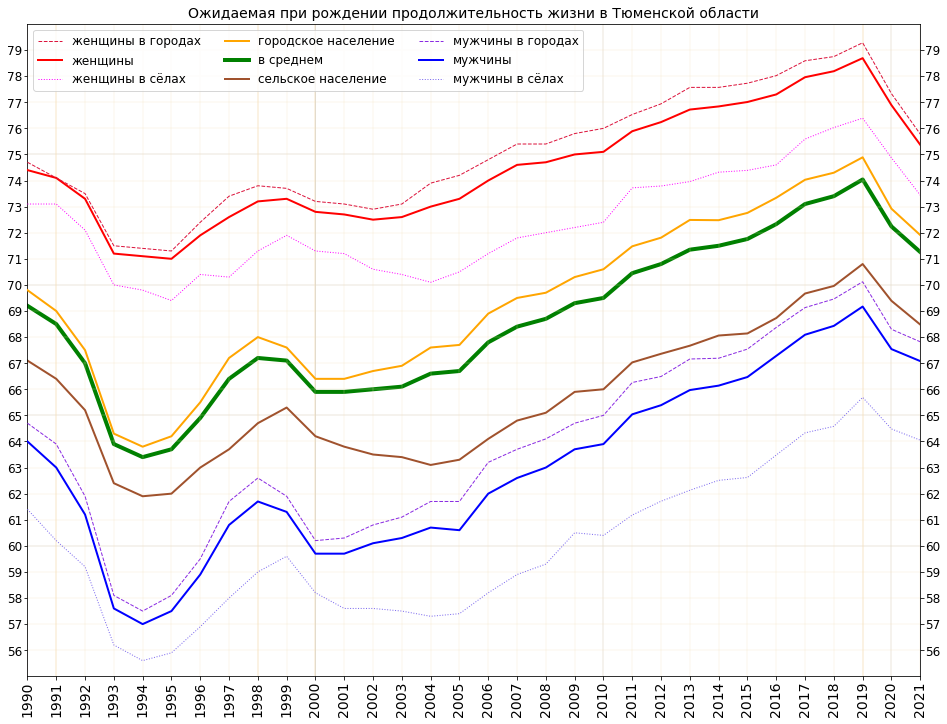

In [51]:
region_name = RegionName(nominative='Тюменская область', genitive='Тюменской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_2=(8, 15), empty_labels_1_up=1, empty_labels_2_up=1, ylim_3=(-1, 5), legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Tyumen Oblast')

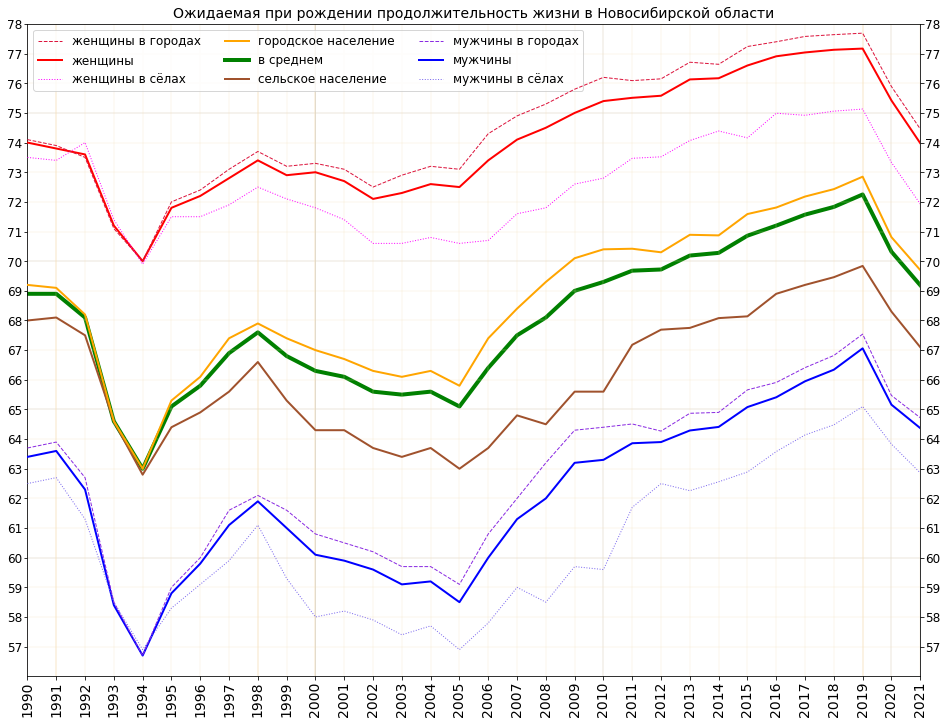

In [52]:
region_name = RegionName(nominative='Новосибирская область', genitive='Новосибирской области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(56, 78), empty_labels_1_up=0, ylim_2=(9, 15), empty_labels_2_up=1,
                           ylim_3=(-2, 5), empty_labels_3_down=2, legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Novosibirsk Oblast')

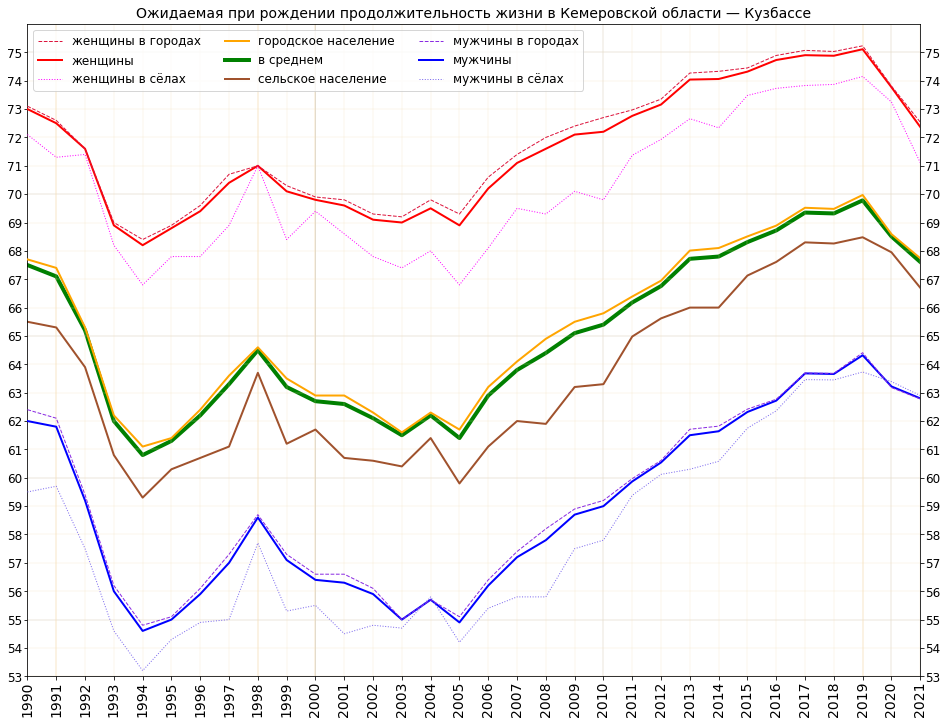

In [53]:
region_name = RegionName(nominative='Кузбасс', genitive='Кемеровской области — Кузбассе')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_down=0, empty_labels_1_up=1,
                           ylim_3=(-3, 3), empty_labels_3_down=3, legend_loc_3='lower left')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Kuzbass')

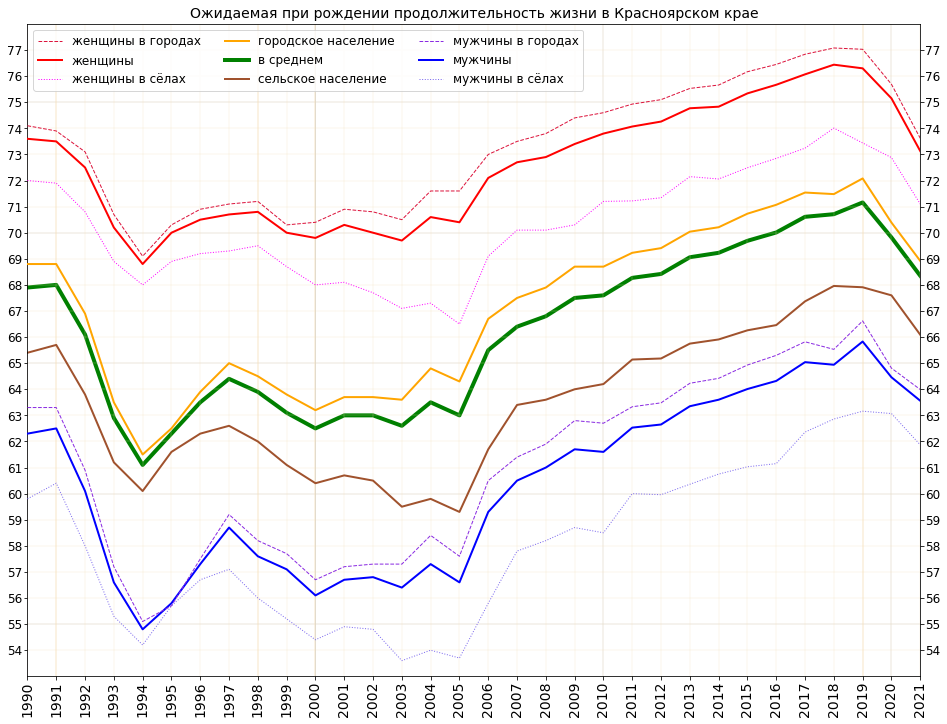

In [54]:
region_name = RegionName(nominative='Красноярский край', genitive='Красноярском крае')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(empty_labels_1_up=1, ylim_3=(-1, 5), empty_labels_3_down=1, legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Krasnoyarsk Krai')

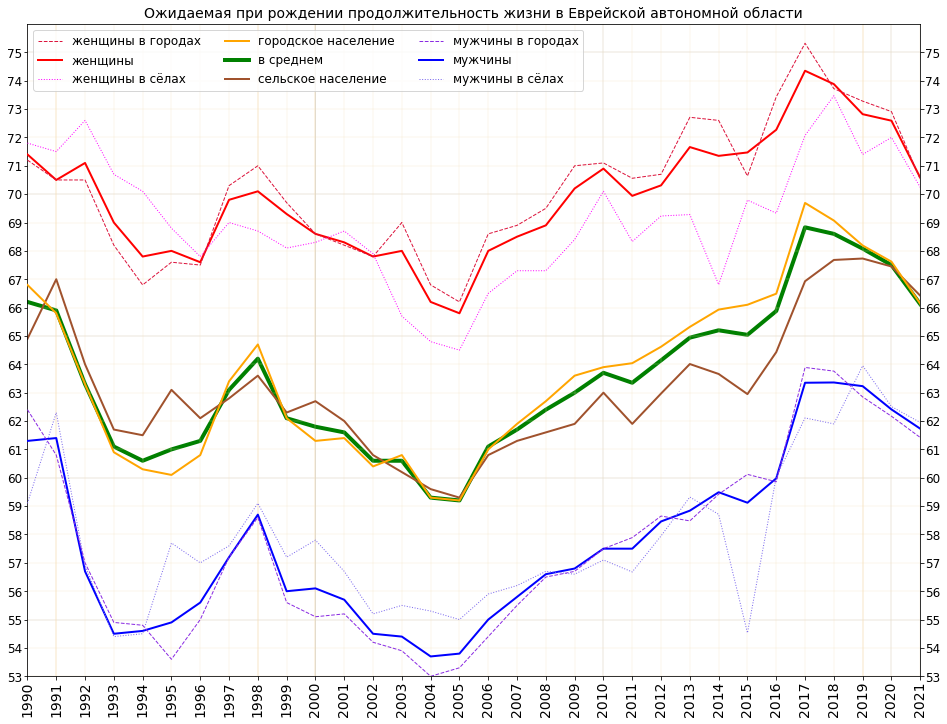

In [55]:
region_name = RegionName(nominative='Еврейская авт. обл.', genitive='Еврейской автономной области')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(53, 76), empty_labels_1_down=0, empty_labels_1_up=1, empty_labels_2_up=1,
                           ylim_3=(-5, 6), empty_labels_3_down=1, legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Jewish Autonomous Oblast')

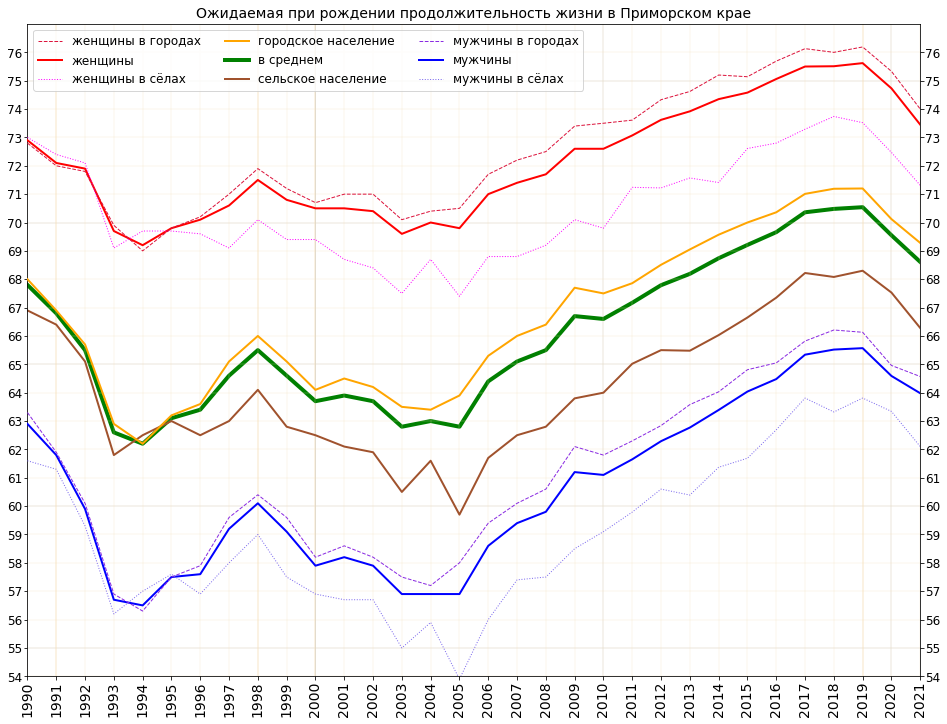

In [56]:
region_name = RegionName(nominative='Приморский край', genitive='Приморском крае')

if CHART_COMPLEXITY == 'simple':
    figure_size = FIGURE_SIZE_SIMPLE
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = FIGURE_SIZE_WITH_DIFF

chart_params = ChartParams(ylim_1=(54, 77), empty_labels_1_down=0, empty_labels_1_up=1, empty_labels_2_up=1,
                           ylim_3=(-1, 5), empty_labels_3_down=0, legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Primorsky Krai')

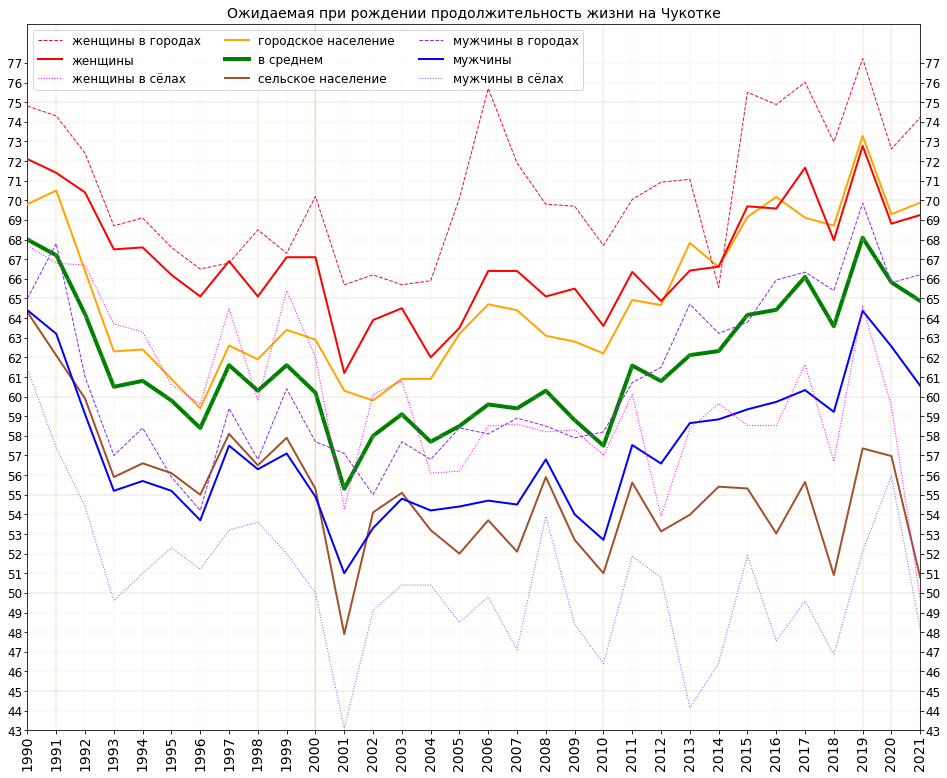

In [57]:
region_name = RegionName(nominative='Чукотка', genitive='Чукотке')

if CHART_COMPLEXITY == 'simple':
    figure_size = (16, 13)
elif CHART_COMPLEXITY == 'with_differences':
    figure_size = (15, 18)

chart_params = ChartParams(ylim_1=(43, 79), empty_labels_1_up=2, empty_labels_1_down=0, ylim_2=(2, 18),
                           empty_labels_2_up=1, ylim_3=(2, 21), empty_labels_3_down=0, legend_loc_3='lower right')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   chart_params=chart_params,
                   lang=LANG, file_name='Life expectancy in Russian subject -Chukotka')

<br />
<br />
<br />

---

##### Calculate and handle data about Crimea in general

In [59]:
popl = pd.read_csv('data/population_Crimea.csv', sep='\t')
columns = popl.columns.to_list()
popl.columns = columns[:2] + [int(year) for year in columns[2:]]
popl

region     location     2014     2015     2016     2017     2018     2019     2020     2021
0  Республика Крым  все_локации  1884400  1901500  1909600  1912950  1912775  1912220  1907100  1898985
1  Республика Крым        город   956300   965400   971100   974139   974835   975045   970720   964191
2  Республика Крым         село   928100   936100   938500   938811   937940   937175   936380   934794
3      Севастополь  все_локации   386500   407600   422500   432712   439941   446175   479565   516025
4      Севастополь        город   356600   377200   391900   402023   409269   415668   449084   485636
5      Севастополь         село    29900    30400    30600    30689    30672    30507    30481    30389

In [60]:
def calculate_weighted_le(genloc, popl,
                          region_1='Республика Крым',
                          region_2='Севастополь',
                          region_output='Крым',
                          location='все_локации',
                          gender='все_гендеры'):
    le_1 = genloc.loc[(genloc['region'] == region_1) & (genloc['gender'] == gender) & (genloc['location'] == location)].iloc[0, 3:]
    le_1.name = 'le_1'

    le_2 = genloc.loc[(genloc['region'] == region_2) & (genloc['gender'] == gender) & (genloc['location'] == location)].iloc[0, 3:]
    le_2.name = 'le_2'

    popl_1 = popl.loc[(popl['region'] == region_1) & (popl['location'] == location)].iloc[0, 2:]
    popl_1.name = 'popl_1'

    popl_2 = popl.loc[(popl['region'] == region_2) & (popl['location'] == location)].iloc[0, 2:]
    popl_2.name = 'popl_2'
    
    # we can made arithmetic operation with series but concatenation to data frame is additional checking that everything is correct
    df = pd.concat([le_1, popl_1, le_2, popl_2], axis='columns')
    
    ser_1 = (df.le_1 * df.popl_1 + df.le_2 * df.popl_2) / (df.popl_1 + df.popl_2)
    ser_0 = pd.Series({'region': region_output, 'gender': gender, 'location': location})
    return pd.concat([ser_0, ser_1])

crimea_al_ag     = calculate_weighted_le(genloc, popl, location='все_локации')
crimea_al_male   = calculate_weighted_le(genloc, popl, location='все_локации', gender='мужчины')
crimea_al_female = calculate_weighted_le(genloc, popl, location='все_локации', gender='женщины')

crimea_urban_ag     = calculate_weighted_le(genloc, popl, location='город')
crimea_urban_male   = calculate_weighted_le(genloc, popl, location='город', gender='мужчины')
crimea_urban_female = calculate_weighted_le(genloc, popl, location='город', gender='женщины')

crimea_rural_ag     = calculate_weighted_le(genloc, popl, location='село')
crimea_rural_male   = calculate_weighted_le(genloc, popl, location='село', gender='мужчины')
crimea_rural_female = calculate_weighted_le(genloc, popl, location='село', gender='женщины')

df_crimea = pd.concat([crimea_al_female, crimea_urban_female, crimea_rural_female,
                       crimea_al_male, crimea_urban_male, crimea_rural_male,
                       crimea_al_ag, crimea_urban_ag, crimea_rural_ag], axis=1).T

df_crimea.fillna('')

region       gender     location 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013       2014       2015       2016       2017       2018       2019       2020       2021
0   Крым      женщины  все_локации                                                                                                                          75.861680  75.725320  75.995517  76.886418  77.226749  77.531079  76.488085  74.487775
1   Крым      женщины        город                                                                                                                          74.487308  75.736330  75.838797  76.974830  77.217357  77.304166  76.572891  74.507794
2   Крым      женщины         село                                                                                                                          78.440886  75.723080  76.218102  76.755770  77.234030  77.869079  76.325763  74.463826
3   Крым      мужчины  все_локации                                                                                                                          65.903593  65.177619  65.681454  67.338263  67.493091  67.928375  66.718319  65.857006
4   Крым      мужчины        город                                                                                                                          63.582379  64.331141  64.633554  66.941795  67.133911  67.259144  66.427975  65.475519
5   Крым      мужчины         село                                                                                                                          69.739638  66.358926  67.114424  67.859381  67.952951  68.859306  67.125889  66.414531
6   Крым  все_гендеры  все_локации                                                                                                                          71.002103  70.546478  70.903050  72.252728  72.483660  72.865132  71.678226  70.244869
7   Крым  все_гендеры        город                                                                                                                          69.122869  70.171044  70.308924  72.140784  72.362677  72.461655  71.627781  70.108282
8   Крым  все_гендеры         село                                                                                                                          74.318065  71.095911  71.749788  72.409381  72.661749  73.464439  71.743821  70.461773

In [61]:
genloc = pd.concat([genloc, df_crimea])

explore_region(genloc, region='Крым', year_start=2014)

2014       2015       2016       2017       2018       2019       2020       2021
gender      location                                                                                           
женщины     все_локации  75.861680  75.725320  75.995517  76.886418  77.226749  77.531079  76.488085  74.487775
            город        74.487308  75.736330  75.838797  76.974830  77.217357  77.304166  76.572891  74.507794
            село         78.440886  75.723080  76.218102  76.755770  77.234030  77.869079  76.325763  74.463826
мужчины     все_локации  65.903593  65.177619  65.681454  67.338263  67.493091  67.928375  66.718319  65.857006
            город        63.582379  64.331141  64.633554  66.941795  67.133911  67.259144  66.427975  65.475519
            село         69.739638  66.358926  67.114424  67.859381  67.952951  68.859306  67.125889  66.414531
все_гендеры все_локации  71.002103  70.546478  70.903050  72.252728  72.483660  72.865132  71.678226  70.244869
            город        69.122869  70.171044  70.308924  72.140784  72.362677  72.461655  71.627781  70.108282
            село         74.318065  71.095911  71.749788  72.409381  72.661749  73.464439  71.743821  70.461773

Data has written to file


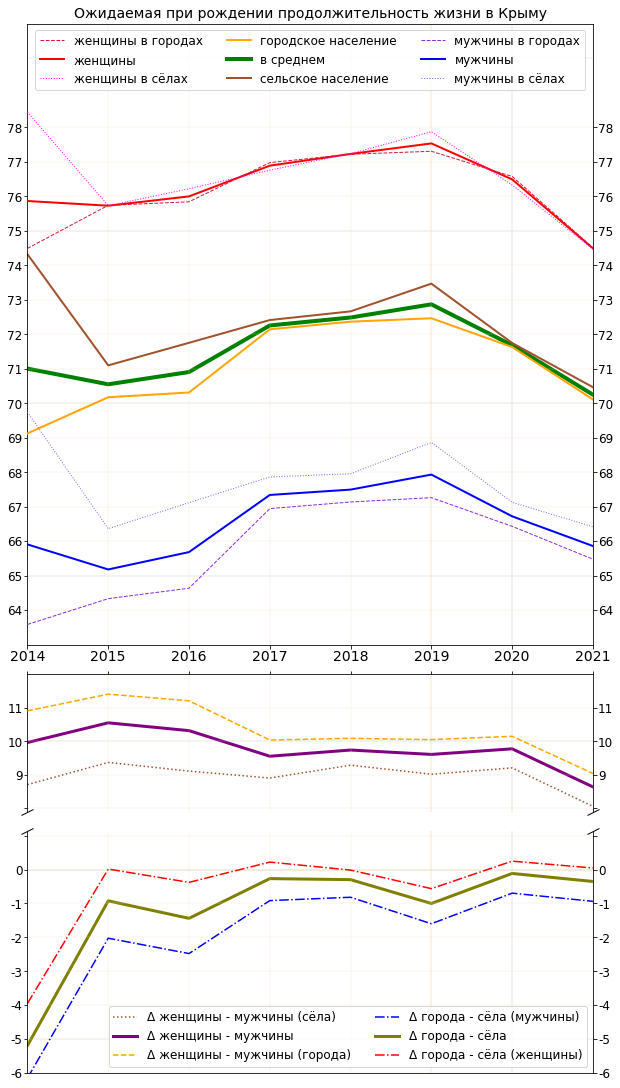

In [62]:
CHART_COMPLEXITY = 'with_differences'

region_name = RegionName(nominative='Крым', genitive='Крыму')
year_start = 2014
hor_lines = [2019]

if CHART_COMPLEXITY == 'simple':
    figure_size = (10.1, 10.1)

elif CHART_COMPLEXITY == 'with_differences':
    figure_size = (8.5, 15)

chart_params = ChartParams(ylim_1=(63, 81), empty_labels_1_up=3, legend_loc_1='upper center' if LANG=='ru' else 'upper center',
                           empty_labels_2_up=1, ylim_3=(-6, 1), empty_labels_3_down=0, legend_loc_3='lower right',
                           label_x_rotation='horizontal')

_ = process_region(genloc, region_name, chart_complexity=CHART_COMPLEXITY, figure_size=figure_size,
                   year_start=year_start, hor_lines=hor_lines, chart_params=chart_params,
                   lang='ru', destination='file', file_name='Life expectancy in Russian subject -Crimea')

<br />
<br />

---

In [165]:
def filter_info_about_region(genloc, region, year_start=2014):
    df = genloc.loc[(genloc['region'] == region) & (genloc['location'] == 'все_локации')] \
               .set_index('gender')  \
               .loc[:, year_start:]
               # .rename(index={'все_гендеры': 'в среднем'})  \

    df.index.name = ''
    df.name = region
    
    # df = df.drop(['region', 'location'] + [year for year in range(1990, year_start)], axis='columns')
    # df.set_index('gender', inplace=True)
    
           # .drop([year for year in range(1990, year_start)], axis='columns')

    return df
                             
    # & (genloc['gender'] == gender) 
                             
df_Sevastopol = filter_info_about_region(genloc, region='Севастополь')
df_Crimea = filter_info_about_region(genloc, region='Крым')
df_RoCrimea = filter_info_about_region(genloc, region='Республика Крым')

print(df_Crimea.name)
df_Crimea

Крым


2014       2015       2016       2017       2018       2019       2020       2021
                                                                                                   
женщины       75.86168   75.72532  75.995517  76.886418  77.226749  77.531079  76.488085  74.487775
мужчины      65.903593  65.177619  65.681454  67.338263  67.493091  67.928375  66.718319  65.857006
все_гендеры  71.002103  70.546478   70.90305  72.252728   72.48366  72.865132  71.678226  70.244869

In [166]:
# dirty code, for 1 time usage
def region_comparison_crimea(df1, df2, df3, *, figure_size=FIGURE_SIZE_SIMPLE,
                      title='', hor_lines=HOR_LINES, chart_params=ChartParams(), lang='ru',
                      destination=DESTINATION_OUTPUT, file_name=''):
    
    plt.rcParams['figure.figsize'] = figure_size
    
    year_min = df1.columns[0]
    year_max = df1.columns[-1]
    
    # set where ticks and labels will be shown around charts
    plt.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)
    plt.tick_params(axis='x', which='both', pad=1.5)
    
    # set limits of chart axes
    plt.xlim(year_min, year_max)
    plt.ylim(chart_params.ylim_1[0], chart_params.ylim_1[1])
    
    # set ticks and labels
    labels_x = range(year_min, year_max+1)
    plt.xticks(labels_x, fontsize=14, rotation=chart_params.label_x_rotation)
    labels_y = tuple(range(chart_params.ylim_1[0]+chart_params.empty_labels_1_down, chart_params.ylim_1[1]+1-chart_params.empty_labels_1_up))
    plt.yticks(labels_y, fontsize=12)
    
    # settings grid
    plt.grid(color='wheat', linewidth=0.25)
    
    for year in range(year_min - year_min % 10 + 10, year_max, 10):
        plt.axvline(x=year, color='lightgrey', linewidth=0.8 if year == 2000 else 0.4 , zorder=0)
        
    for age in range(chart_params.ylim_1[0] - chart_params.ylim_1[0] % 5 + 5, chart_params.ylim_1[1], 5):
        plt.axhline(y=age, color='lightgrey', linewidth=0.4, zorder=0)
        
    for year in hor_lines:
        plt.axvline(x=year, color='wheat', linewidth=2, alpha=0.25, zorder=0)

    # set title
    plt.title(label=title, fontsize=14)
    
    # create chart
    if lang == 'en':
        name_1 = 'Sevastopol'
        name_2 = 'Crimea'
        name_3 = 'Resp. Crimea'
        plt.plot(df1.columns, df1.loc['женщины'], color='deeppink', linestyle='--', linewidth=1, label=f'{name_1} female', zorder=11)
        plt.plot(df2.columns, df2.loc['женщины'], color='red', linestyle='-', linewidth=2, label=f'{name_2} female', zorder=13)
        plt.plot(df3.columns, df3.loc['женщины'], color='orangered', linestyle='-.', linewidth=1, label=f'{name_3} female', zorder=12)
        plt.plot(df1.columns, df1.loc['все_гендеры'], color='mediumturquoise', linestyle='--', linewidth=2, label=f'{name_1} on average', zorder=21)
        plt.plot(df2.columns, df2.loc['все_гендеры'], color='green', linestyle='-', linewidth=4, label=f'{name_2} on average', zorder=23)
        plt.plot(df3.columns, df3.loc['все_гендеры'], color='lime', linestyle='-.', linewidth=2, label=f'{name_3} on average', zorder=22)
        plt.plot(df1.columns, df1.loc['мужчины'], color='dodgerblue', linestyle='--', linewidth=1, label=f'{name_1} male', zorder=31)
        plt.plot(df2.columns, df2.loc['мужчины'], color='blue', linestyle='-', linewidth=2, label=f'{name_2} male', zorder=33)
        plt.plot(df3.columns, df3.loc['мужчины'], color='steelblue', linestyle='-.', linewidth=1, label=f'{name_3} male', zorder=32)
    else:
        name_1 = 'Севастополь'
        name_2 = 'Крым'
        name_3 = 'Респ. Крым'
        plt.plot(df1.columns, df1.loc['женщины'], color='deeppink', linestyle='--', linewidth=1, label=f'{name_1} женщины', zorder=11)
        plt.plot(df2.columns, df2.loc['женщины'], color='red', linestyle='-', linewidth=2, label=f'{name_2} женщины', zorder=13)
        plt.plot(df3.columns, df3.loc['женщины'], color='orangered', linestyle='-.', linewidth=1, label=f'{name_3} женщины', zorder=12)
        plt.plot(df1.columns, df1.loc['все_гендеры'], color='mediumturquoise', linestyle='--', linewidth=2, label=f'{name_1} в среднем', zorder=21)
        plt.plot(df2.columns, df2.loc['все_гендеры'], color='green', linestyle='-', linewidth=4, label=f'{name_2} в среднем', zorder=23)
        plt.plot(df3.columns, df3.loc['все_гендеры'], color='lime', linestyle='-.', linewidth=2, label=f'{name_3} в среднем', zorder=22)
        plt.plot(df1.columns, df1.loc['мужчины'], color='dodgerblue', linestyle='--', linewidth=1, label=f'{name_1} мужчины', zorder=31)
        plt.plot(df2.columns, df2.loc['мужчины'], color='blue', linestyle='-', linewidth=2, label=f'{name_2} мужчины', zorder=33)
        plt.plot(df3.columns, df3.loc['мужчины'], color='steelblue', linestyle='-.', linewidth=1, label=f'{name_3} мужчины', zorder=32)
    
    plt.legend(loc=chart_params.legend_loc_1, fontsize=12, ncol=3)
    
    if destination == 'file':
        plt.savefig(f"output_single-simple/{file_name}{' -ru' if lang=='ru' else ''}.png", bbox_inches='tight', facecolor='white', pad_inches=0.05)
        print('Data has written to file')
    else:
        plt.show()

Data has written to file


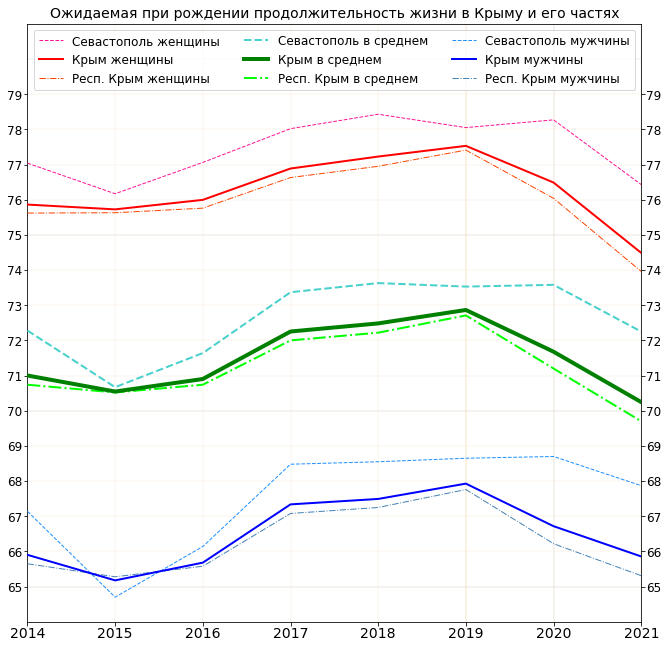

In [167]:
figure_size = (11, 11)
chart_params=ChartParams(ylim_1=(64, 81), empty_labels_1_up=2, legend_loc_1='upper center', label_x_rotation='horizontal')
region_comparison_crimea(df_Sevastopol, df_Crimea, df_RoCrimea, figure_size=figure_size,
                         title='Ожидаемая при рождении продолжительность жизни в Крыму и его частях', chart_params=chart_params,
                         lang='ru', destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russian subject -Crimea and its parts')

Data has written to file


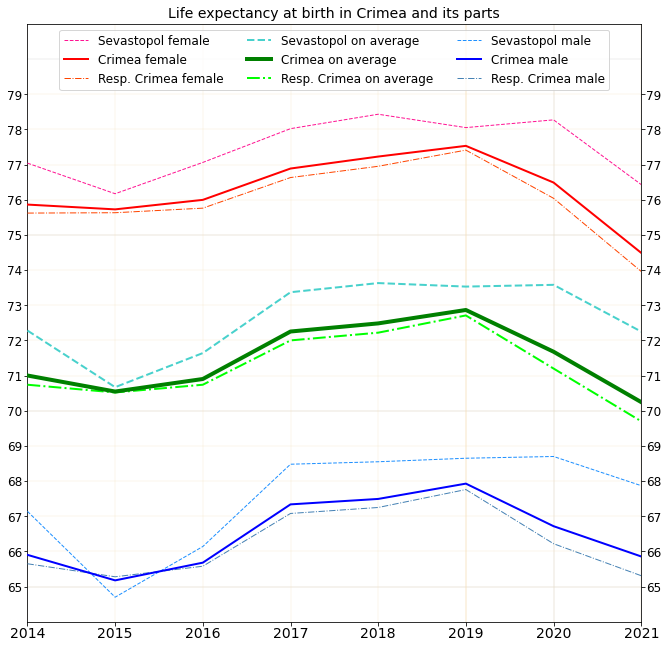

In [168]:
region_comparison_crimea(df_Sevastopol, df_Crimea, df_RoCrimea, figure_size=figure_size,
                         title='Life expectancy at birth in Crimea and its parts', chart_params=chart_params,
                         lang='en', destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russian subject -Crimea and its parts')

<br />
<br />
<br />

---

In [58]:
# play beep to denote completion of the program
import IPython.display as ipd
import numpy as np

# manually generated sound
t = 1  # time is seconds
beep = np.sin(2*np.pi*400*np.arange(10000*t)/10000)
ipd.Audio(beep, rate=10000, autoplay=True)

In [68]:
# explore_region(genloc, region='Крым', year_start=2014)

2014       2015       2016       2017       2018       2019       2020       2021
gender      location                                                                                           
женщины     все_локации  75.861680  75.725320  75.995517  76.886418  77.226749  77.531079  76.488085  74.487775
            город        74.487308  75.736330  75.838797  76.974830  77.217357  77.304166  76.572891  74.507794
            село         78.440886  75.723080  76.218102  76.755770  77.234030  77.869079  76.325763  74.463826
мужчины     все_локации  65.903593  65.177619  65.681454  67.338263  67.493091  67.928375  66.718319  65.857006
            город        63.582379  64.331141  64.633554  66.941795  67.133911  67.259144  66.427975  65.475519
            село         69.739638  66.358926  67.114424  67.859381  67.952951  68.859306  67.125889  66.414531
все_гендеры все_локации  71.002103  70.546478  70.903050  72.252728  72.483660  72.865132  71.678226  70.244869
            город        69.122869  70.171044  70.308924  72.140784  72.362677  72.461655  71.627781  70.108282
            село         74.318065  71.095911  71.749788  72.409381  72.661749  73.464439  71.743821  70.461773

Description of structures:<br>
wiki: [Template:Col-2](https://en.wikipedia.org/wiki/Template:Col-2)<br>
wiki: [Help:Table](https://en.wikipedia.org/wiki/Help:Table)

In [155]:
# # temporary function for generating piece of code for Wikipedia
# def generate_two_column_text_for_wiki(genloc, region='Россия', round_prec=1):
#     df = genloc[(genloc['region'] == region) & (genloc['location'] == 'все_локации')].set_index('gender').loc[:, 2019:]
#     st = ( '{|style="text-align: center;"\n'
#            '!\n'
#            '! style="width:7em;"|2019\n'
#            '! style="width:7em;"|2021\n'
#            '|-\n'
#            '| style="text-align: left;"|Average:\n'
#           f'| {round(df.loc["все_гендеры", 2019], round_prec)} years\n'
#           f'| {round(df.loc["все_гендеры", 2021], round_prec)} years\n'
#            '|-\n'
#            '| style="text-align: left;"|Male:\n'
#           f'| {round(df.loc["мужчины", 2019], round_prec)} years\n'
#           f'| {round(df.loc["мужчины", 2021], round_prec)} years\n'
#            '|-\n'
#            '| style="text-align: left;"|Female:\n'
#           f'| {round(df.loc["женщины", 2019], round_prec)} years\n'
#           f'| {round(df.loc["женщины", 2021], round_prec)} years\n'
#            '|}')
#     return st

# st = generate_two_column_text_for_wiki(genloc, region='Крым')
# print(st)

{|style="text-align: center;"
!
! style="width:7em;"|2019
! style="width:7em;"|2021
|-
| style="text-align: left;"|Average:
| 72.9 years
| 70.2 years
|-
| style="text-align: left;"|Male:
| 67.9 years
| 65.9 years
|-
| style="text-align: left;"|Female:
| 77.5 years
| 74.5 years
|}
